In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ambulance_game as abg

# Single run simulation

In [2]:
# Simulation Parameters
lambda_a = 0.15       # Ambulance: 6 arrivals per hour
lambda_o = 0.2       # Others: 12 arrivals per hour
mu = 0.05            # Service time: 3 services per hour
num_of_servers = 8   # Number of servers: 8 servers
threshold = 8       # Threshold of accepting ambulance patients
seed_num = None      # ciw.seed value
runtime = 1440       # runtime of the simulation

In [3]:
records = abg.models.simulate_model(lambda_a=lambda_a, lambda_o=lambda_o, mu=mu, num_of_servers=num_of_servers, threshold=threshold, seed_num=seed_num, runtime=runtime).get_all_records()
blocks = [b.time_blocked for b in records]
waits = [w.waiting_time for w in records]
print("Mean blocking time: ", np.mean(blocks))
print("Mean waiting time: ", np.mean(waits))

Mean blocking time:  6.199878643332171
Mean waiting time:  2.22064581036276


# Results of multiple simulations

In [4]:
# Simulation Parameters
lambda_a = 0.15       # Ambulance: 6 arrivals per hour
lambda_o = 0.2       # Others: 12 arrivals per hour
mu = 0.05            # Service time: 3 services per hour
num_of_servers = 8   # Number of servers: 8 servers
threshold = 4        # Threshold of accepting ambulance patients
seed_num = None      # ciw.seed value
runtime = 1440       # runtime of the simulation

# Multiple runs parameters
warm_up_time = 100
num_of_trials = 10
output_type = "tuple"
seed_num = None

In [5]:
res = abg.models.get_multiple_runs_results(lambda_a=lambda_a, lambda_o=lambda_o, mu=mu, num_of_servers=num_of_servers, threshold=threshold, seed_num=seed_num, warm_up_time=warm_up_time, num_of_trials=num_of_trials, output_type=output_type, runtime=runtime)
mean_wait = np.mean([np.mean(w.waiting_times) for w in res])
mean_block = np.mean([np.mean(b.blocking_times) for b in res])
print("Mean blocking time for multiple trials: ", mean_block)
print("Mean waiting time for multiple trials: ", mean_wait)

Mean blocking time for multiple trials:  395.49459632490215
Mean waiting time for multiple trials:  0.3511570642543412


# Timing Experiment 1

In [6]:
# Queueing Parameters
lambda_a = 0.1       # Ambulance: 6 arrivals per hour
lambda_o = 0.05      # Others: 3 arrivals per hour
mu = 0.05            # Service time: 3 services per hour
num_of_servers = 8   # Number of servers: 8 servers
threshold = 4        # Threshold of accepting ambulance patients

# Timing Experiment parameters
num_of_trials = 20      # Number of trials to be considered
repetition = 5           # Repetition of each trial
method = "Simulation"     # Method to be used (only Simulation available)
filename = None

In [7]:
times = abg.time_for_different_number_of_trials(lambda_a=lambda_a, lambda_o=lambda_o, mu=mu, num_of_servers=num_of_servers, threshold=threshold, num_of_trials=num_of_trials, repeat_trial=repetition, method=method, filename=filename)

In [8]:
# Old Files: Trials_500_rep_15.txt, Trials_1000_rep_20.txt, Trials_343_rep_50.txt
# New Files: Trials_500_rep_20.txt

# times = abg.old_import_trials_duration(path='Trials/Trials_500_rep_15.txt')
# times = abg.import_trials_duration(path='Trials/Trials_500_rep_20.txt')

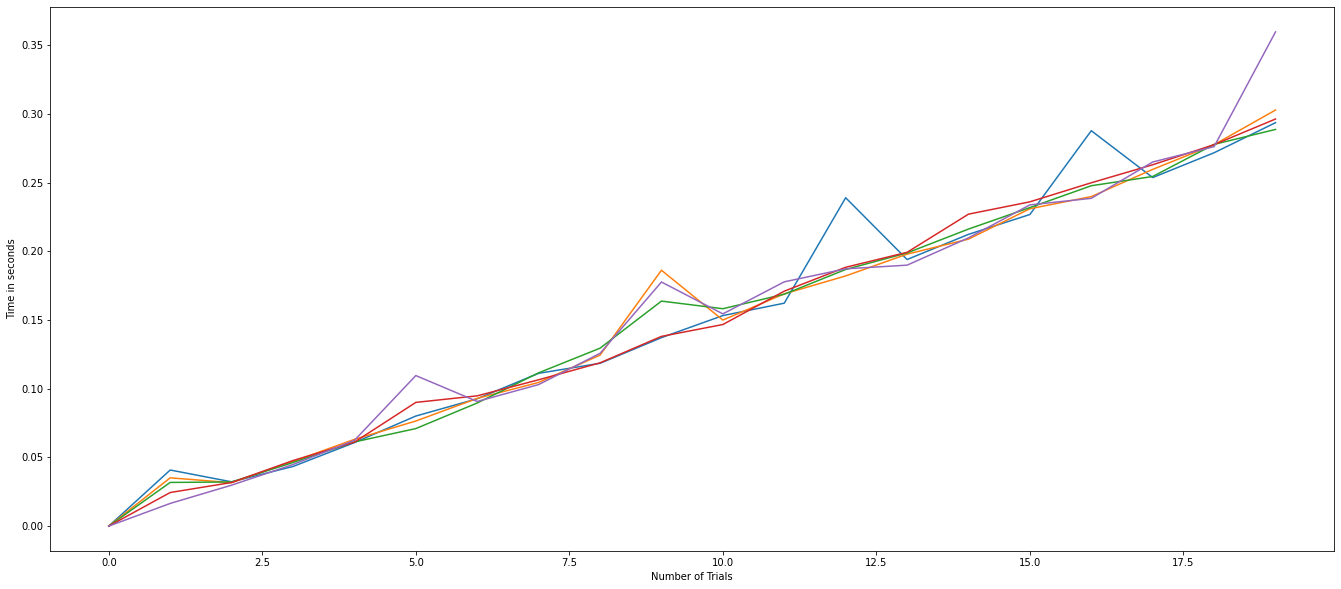

In [9]:
abg.get_duration_all_lines_plot(times=times)
plt.show()

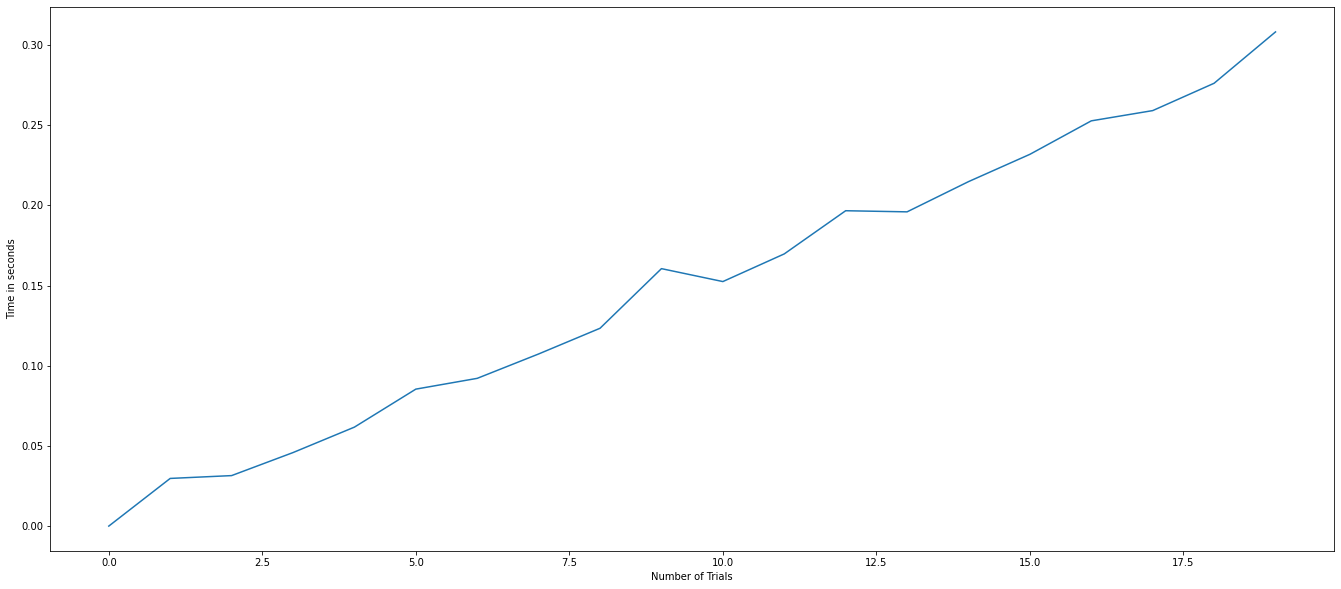

In [10]:
abg.get_duration_mean_plot(times=times)
plt.show()

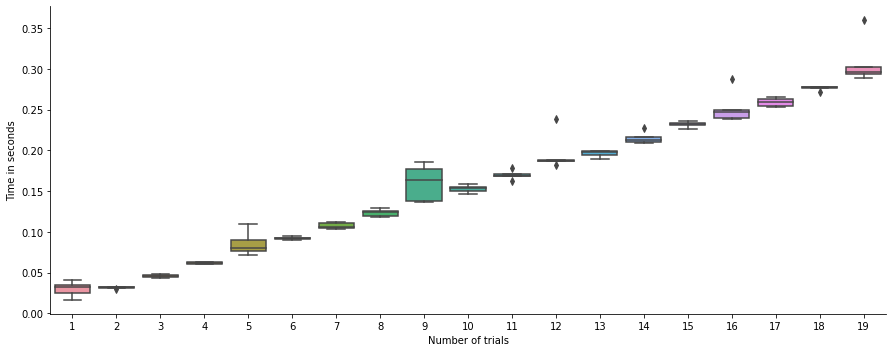

In [11]:
abg.get_duration_distribution_plot(times=times, kind="box")
plt.show()

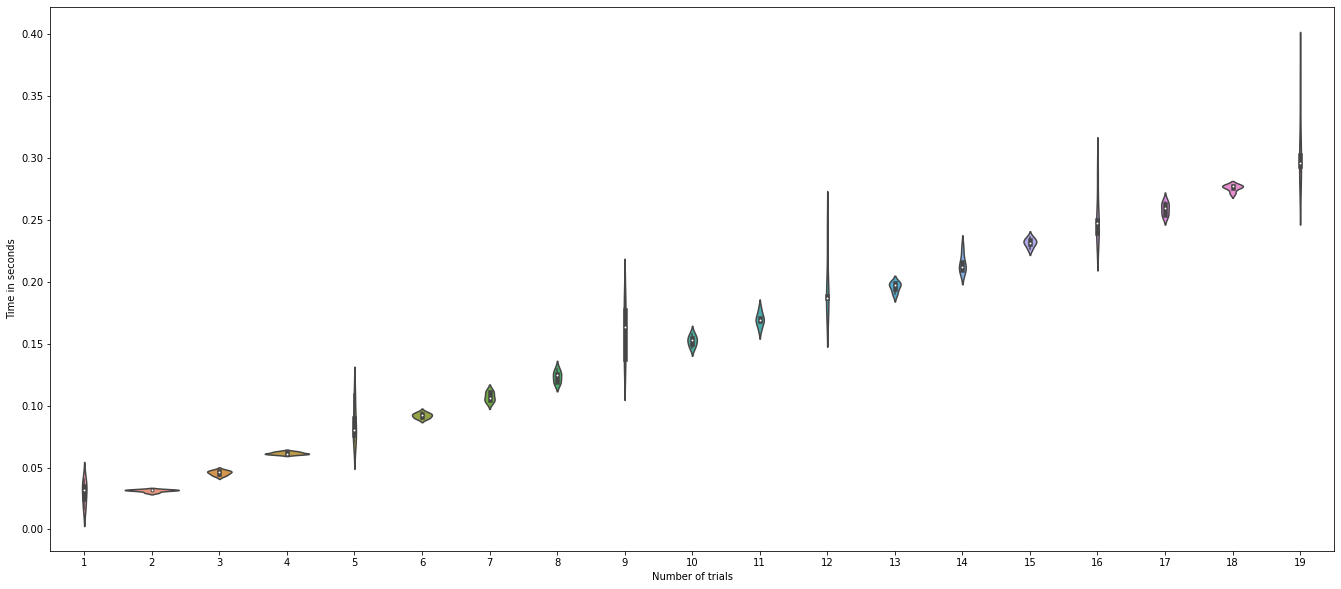

In [12]:
abg.get_duration_distribution_plot(times=times, kind="violin")
plt.show()

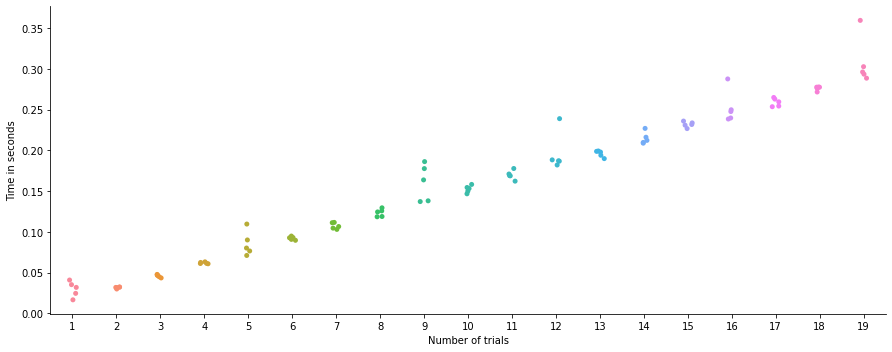

In [13]:
abg.get_duration_distribution_plot(times=times)
plt.show()

# Timing Experiment 2 - Investigate convergence of times

#### Hospital 1: lambda_a = 0.15, lambda_o = 0.2, mu = 0.05, num_of_servers = 8, threshold = 5
#### Hospital 2: lambda_a = 0.15, lambda_o = 0.1, mu = 0.04, num_of_servers = 7, threshold = 4
#### Hospital 3: lambda_a = 0.3, lambda_o = 0.3, mu = 0.05, num_of_servers= 12, threshold = 10
#### Hospital 4: lambda_a = 0.2, lambda_o = 0.3, mu = 0.05, num_of_servers= 13, threshold = 5

In [24]:
# Queueing Parameters
lambda_a = 0.15      # Ambulance: 9 arrivals per hour
lambda_o = 0.2       # Others: 12 arrivals per hour
mu = 0.05            # Service time: 3 services per hour
num_of_servers = 8   # Number of servers: 8 servers
threshold = 5        # Threshold of accepting ambulance patients
seed_num = None
warm_up_time = 100
output_type = "list"

# Timing Parameters
num_of_trials = 50

In [25]:
time_results = abg.models.get_multiple_runs_results(lambda_a=lambda_a, lambda_o=lambda_o, mu=mu, num_of_servers=num_of_servers, threshold=threshold, seed_num=seed_num, warm_up_time=warm_up_time, num_of_trials=num_of_trials, output_type=output_type)
time_results2 = abg.models.get_multiple_runs_results(lambda_a=0.15, lambda_o=0.1, mu=0.04, num_of_servers=7, threshold=4, seed_num=seed_num, warm_up_time=warm_up_time, num_of_trials=num_of_trials, output_type=output_type)
time_results3 = abg.models.get_multiple_runs_results(lambda_a=0.3, lambda_o=0.3, mu=0.05, num_of_servers=12, threshold=10, seed_num=seed_num, warm_up_time=warm_up_time, num_of_trials=num_of_trials, output_type=output_type)
time_results4 = abg.models.get_multiple_runs_results(lambda_a=0.2, lambda_o=0.3, mu=0.05, num_of_servers=13, threshold=5, seed_num=seed_num, warm_up_time=warm_up_time, num_of_trials=num_of_trials, output_type=output_type)

###### Waiting Times

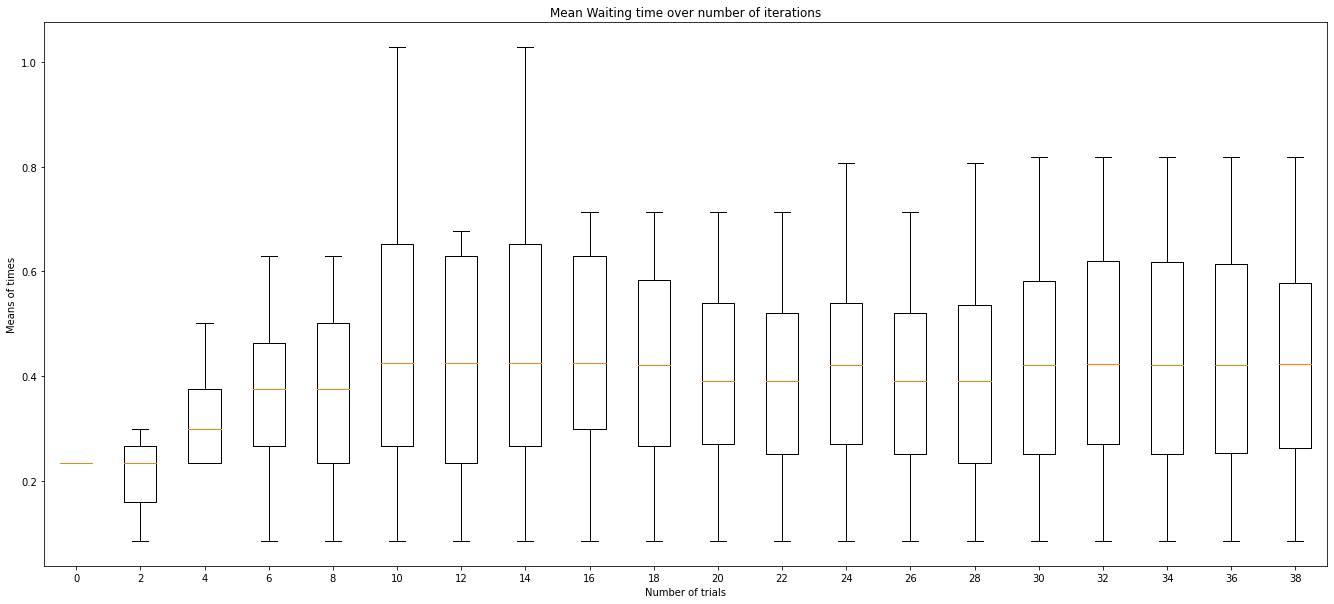

In [26]:
#1: lambda_a = 0.15, lambda_o = 0.2, mu = 0.05, num_of_servers = 8, threshold = 5
abg.make_plot_of_confidence_intervals_over_iterations(all_times=time_results, time_type="w")
plt.show()

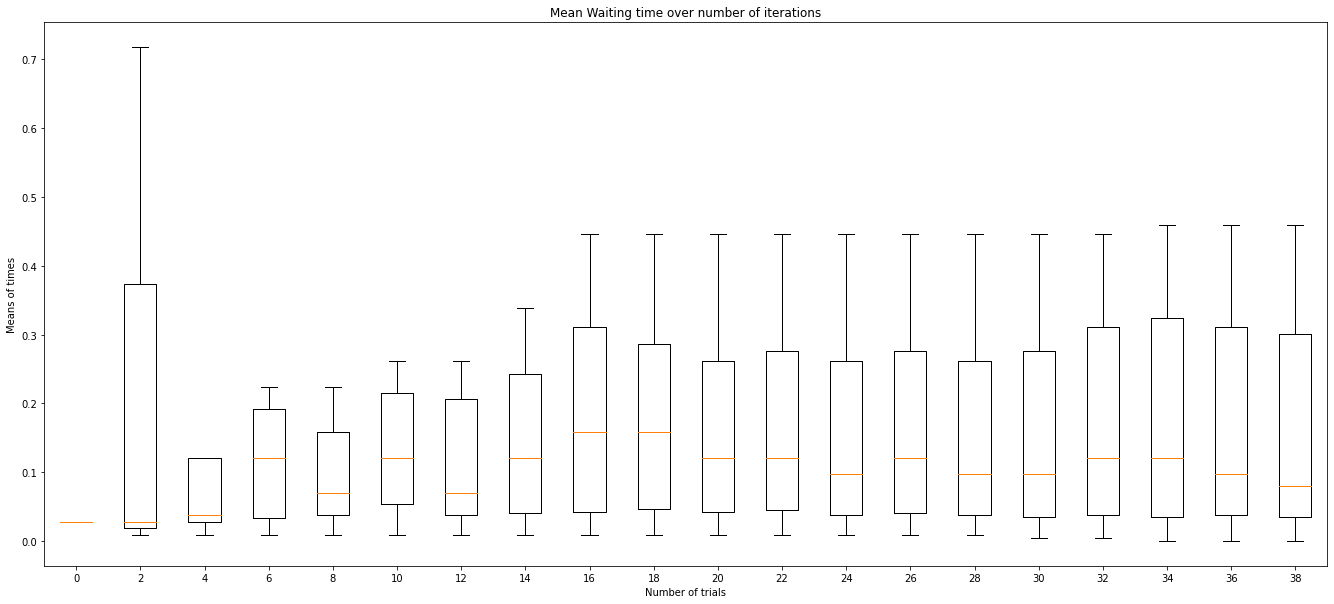

In [27]:
#2: lambda_a = 0.15, lambda_o = 0.1, mu = 0.04, num_of_servers = 7, threshold = 4
abg.make_plot_of_confidence_intervals_over_iterations(all_times=time_results2, time_type="w")
plt.show()

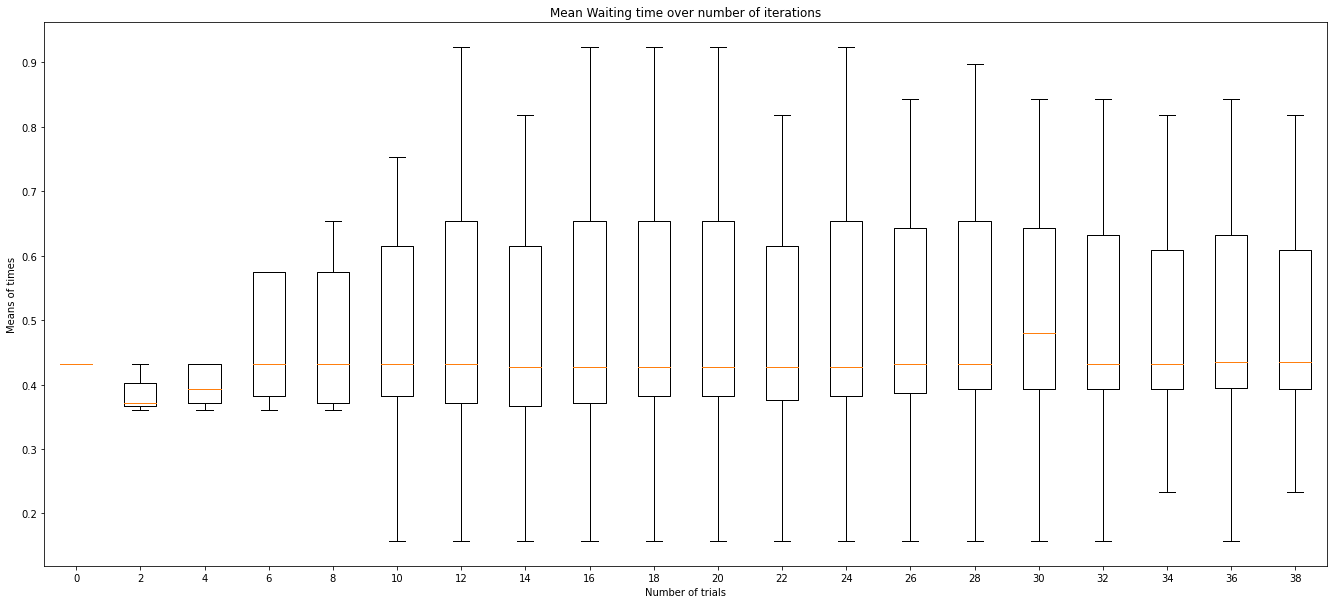

In [28]:
#3: lambda_a=0.3, lambda_o=0.3, mu=0.05, num_of_servers=12, threshold=10
abg.make_plot_of_confidence_intervals_over_iterations(all_times=time_results3, time_type="w")
plt.show()

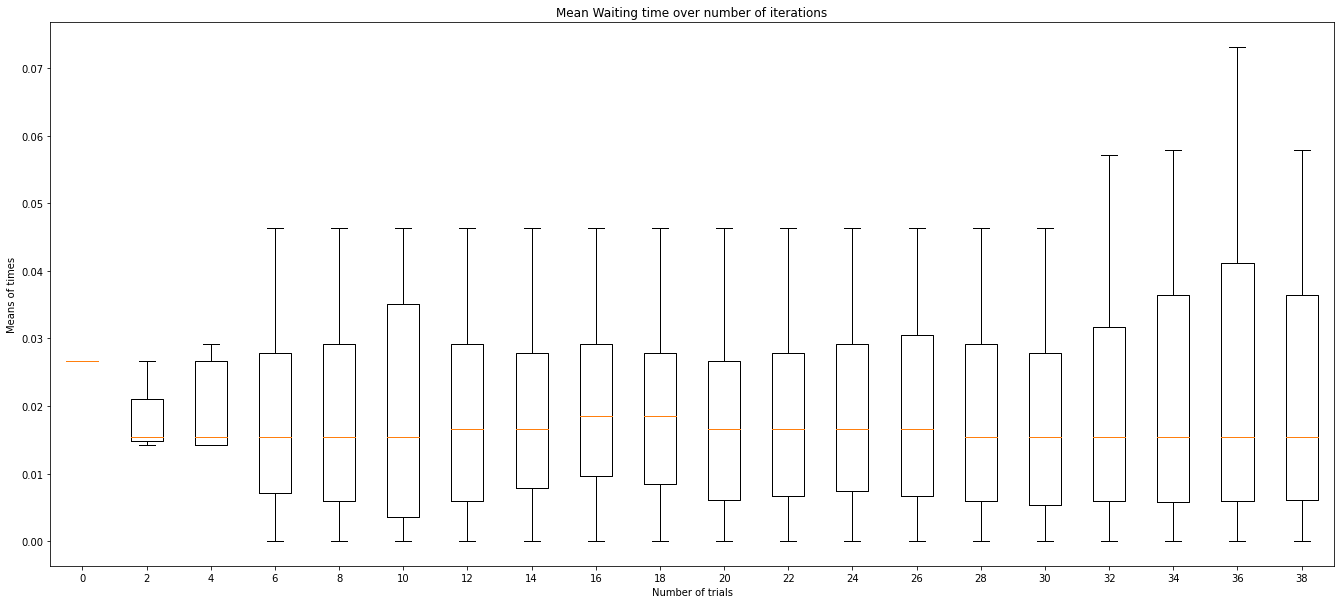

In [29]:
#4: lambda_a=0.2, lambda_o=0.3, mu=0.05, num_of_servers=13, threshold=5
abg.make_plot_of_confidence_intervals_over_iterations(all_times=time_results4, time_type="w")
plt.show()

###### Blocking Times

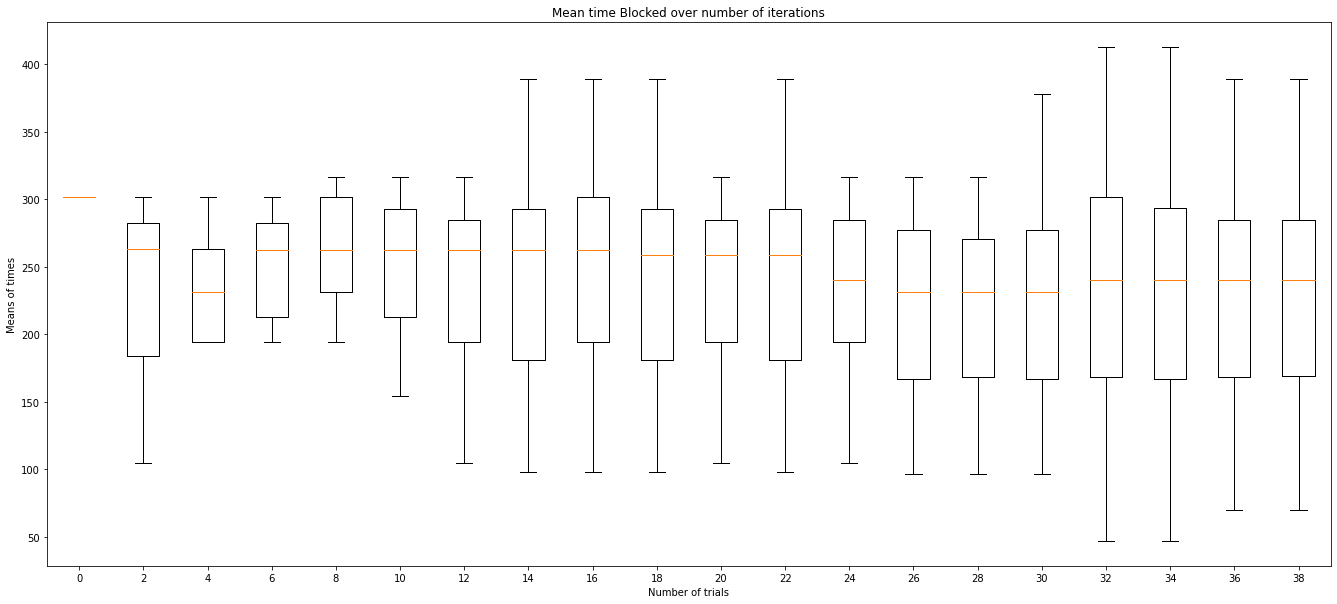

In [30]:
#1: lambda_a = 0.15, lambda_o = 0.2, mu = 0.05, num_of_servers = 8, threshold = 5
abg.make_plot_of_confidence_intervals_over_iterations(all_times=time_results, time_type="b")
plt.show()

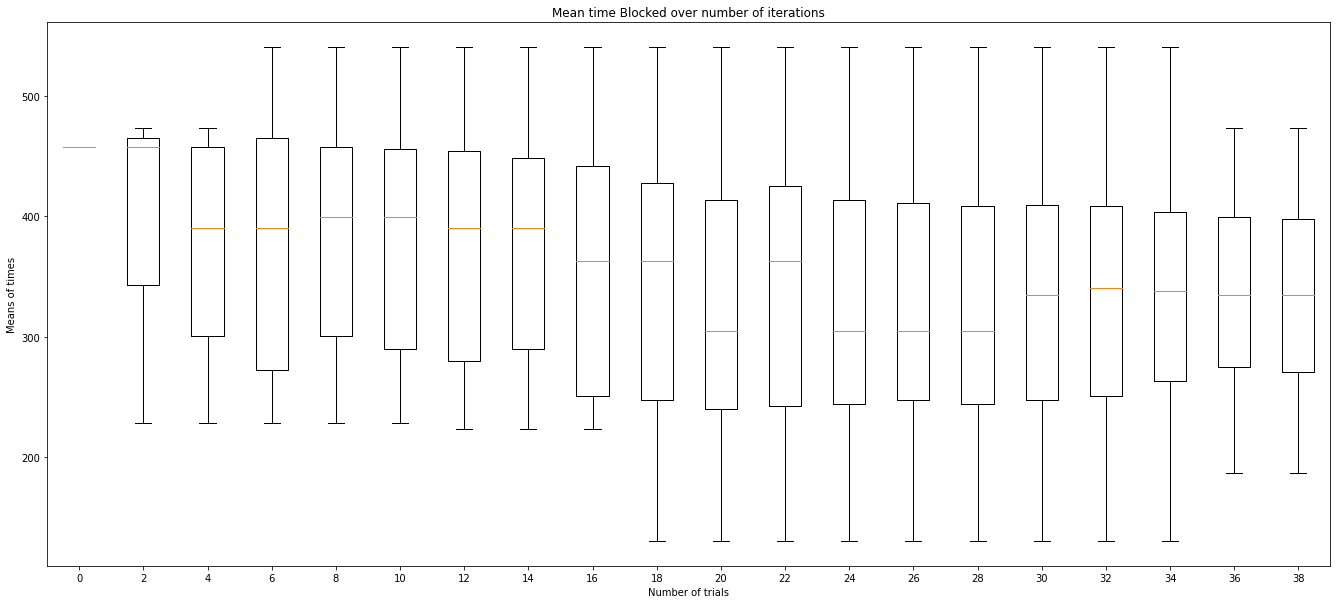

In [31]:
#2: lambda_a = 0.15, lambda_o = 0.1, mu = 0.04, num_of_servers = 7, threshold = 4
abg.make_plot_of_confidence_intervals_over_iterations(all_times=time_results2, time_type="b")
plt.show()

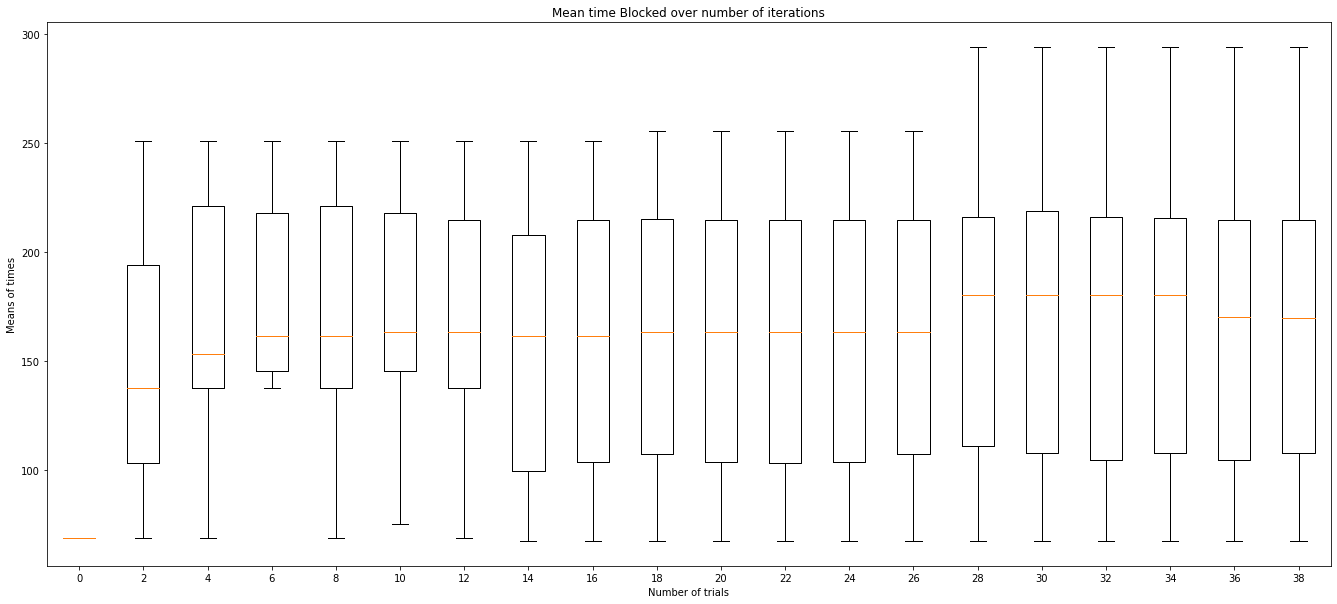

In [32]:
#3: lambda_a=0.3, lambda_o=0.3, mu=0.05, num_of_servers=12, threshold=10
abg.make_plot_of_confidence_intervals_over_iterations(all_times=time_results3, time_type="b")
plt.show()

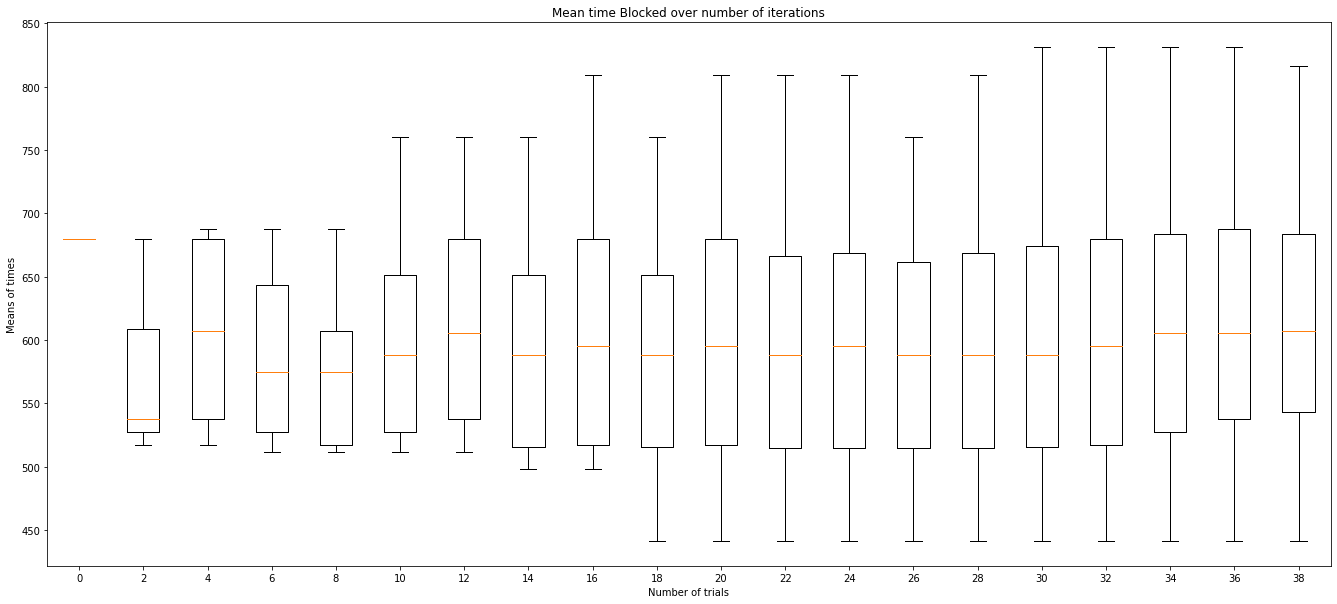

In [33]:
#4: lambda_a=0.2, lambda_o=0.3, mu=0.05, num_of_servers=13, threshold=5
abg.make_plot_of_confidence_intervals_over_iterations(all_times=time_results4, time_type="b")
plt.show()

# Model plot 1 - Plots for different thresholds

In [38]:
# Queueing Parameters
lambda_a = 0.1       # Ambulance: 6 arrivals per hour
lambda_o = 0.05      # Others: 3 arrivals per hour
mu = 0.02            # Service time: 3 services per hour
num_of_servers = 8   # Number of servers: 8 servers
seed_num = None
runtime = 1440

# Plot Parameters
num_of_trials = 500
measurement_type = "both"      # The measurement to be plotted ["w":waiting times, "b":blocking times, otherwise: both]

###### Waiting Times

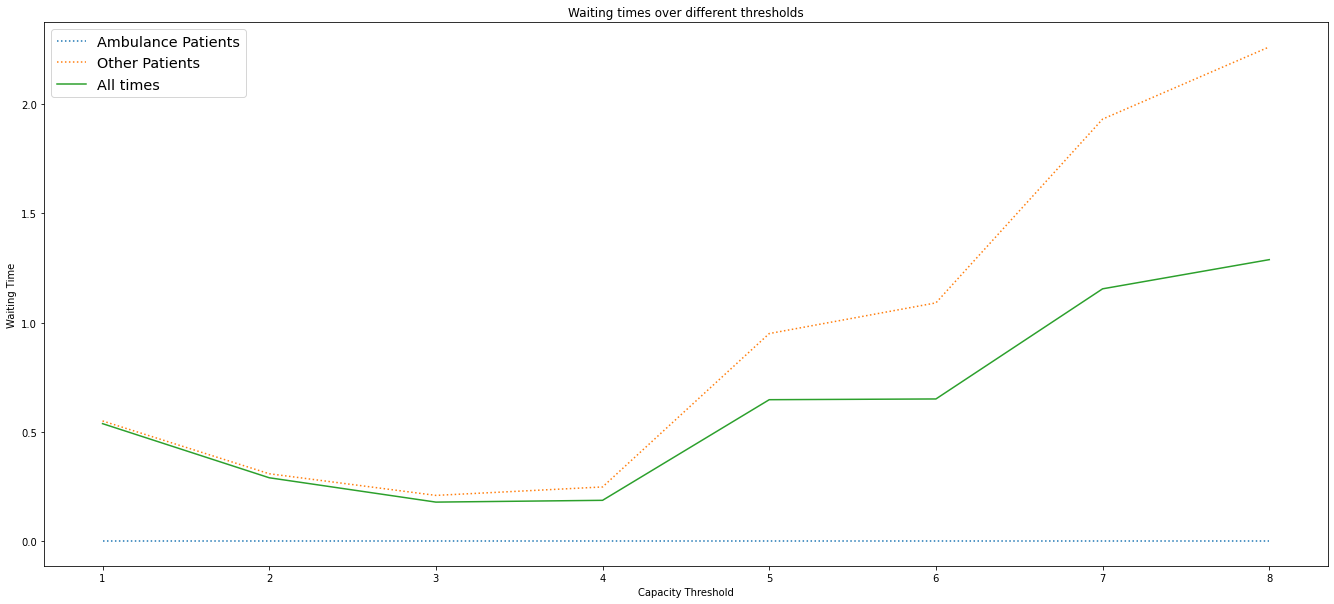

In [39]:
#1: lambda_a = 0.15, lambda_o = 0.2, mu = 0.05, num_of_servers = 8
abg.make_plot_for_different_thresholds(lambda_a=0.15, lambda_o=0.2, mu=0.05, num_of_servers=8, num_of_trials=num_of_trials, seed_num=seed_num, measurement_type="w", runtime=runtime)
plt.show()

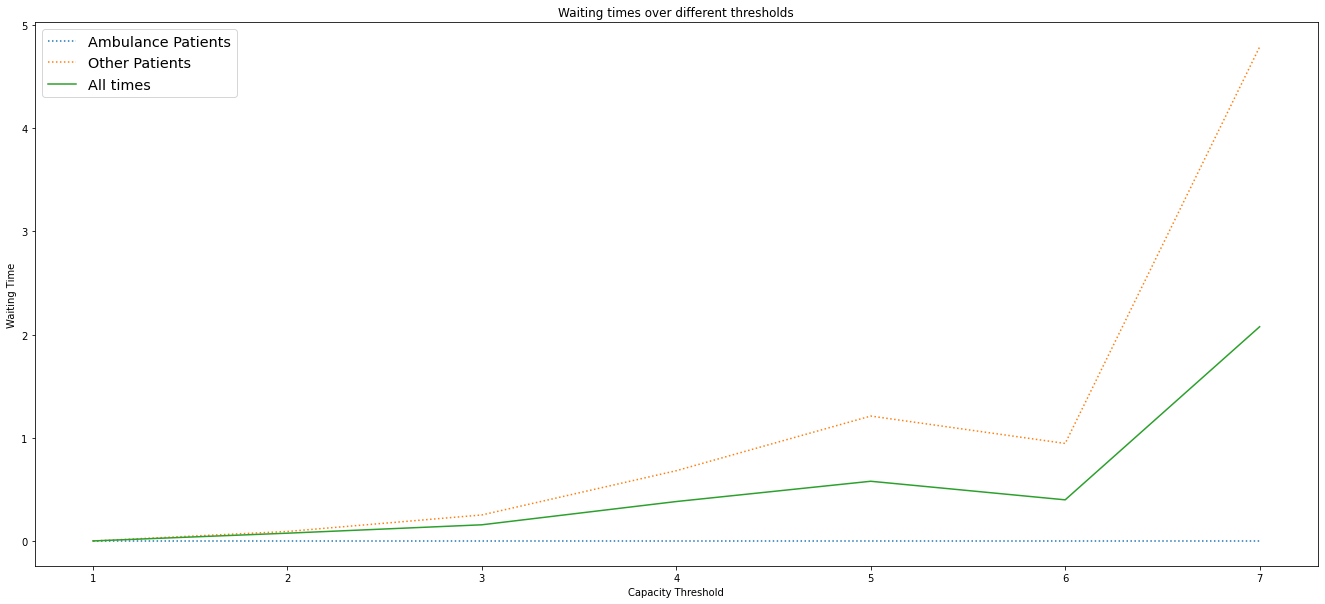

In [40]:
#2: lambda_a=0.15, lambda_o=0.1, mu=0.04, num_of_servers=7
abg.make_plot_for_different_thresholds(lambda_a=0.15, lambda_o=0.1, mu=0.04, num_of_servers=7, num_of_trials=num_of_trials, seed_num=seed_num, measurement_type="w", runtime=runtime)
plt.show()

C:\Users\micha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\micha\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


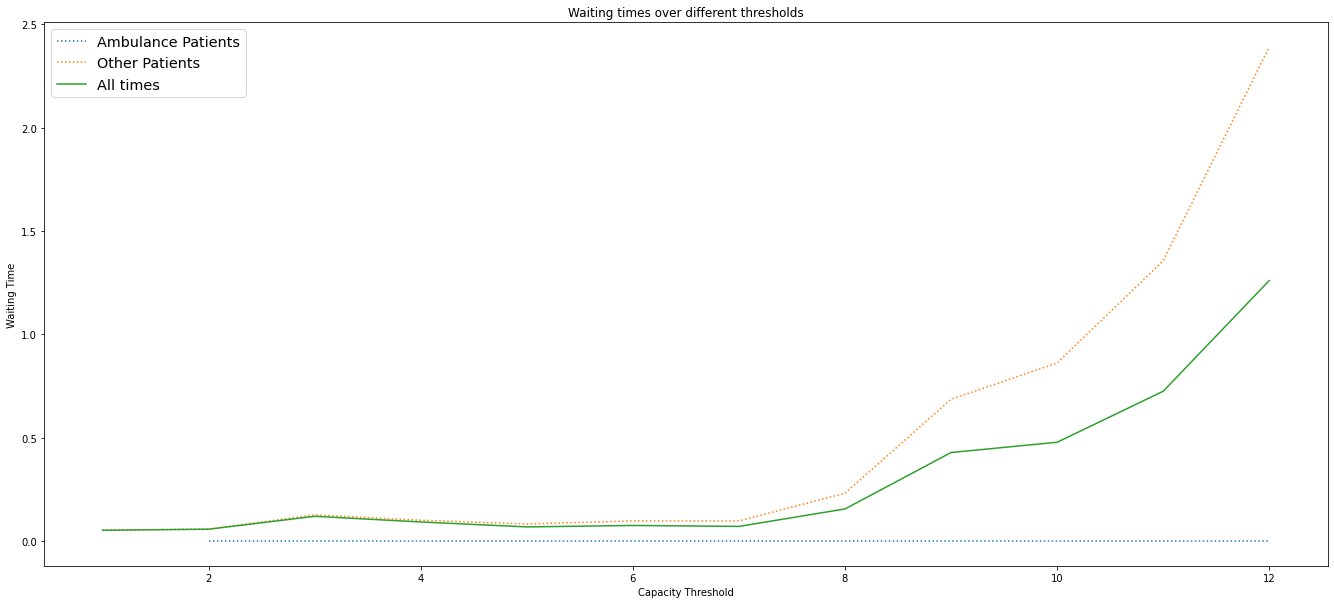

In [41]:
#3: lambda_a=0.3, lambda_o=0.3, mu=0.05, num_of_servers=12
abg.make_plot_for_different_thresholds(lambda_a=0.3, lambda_o=0.3, mu=0.05, num_of_servers=12, num_of_trials=num_of_trials, seed_num=seed_num, measurement_type="w", runtime=runtime)
plt.show()

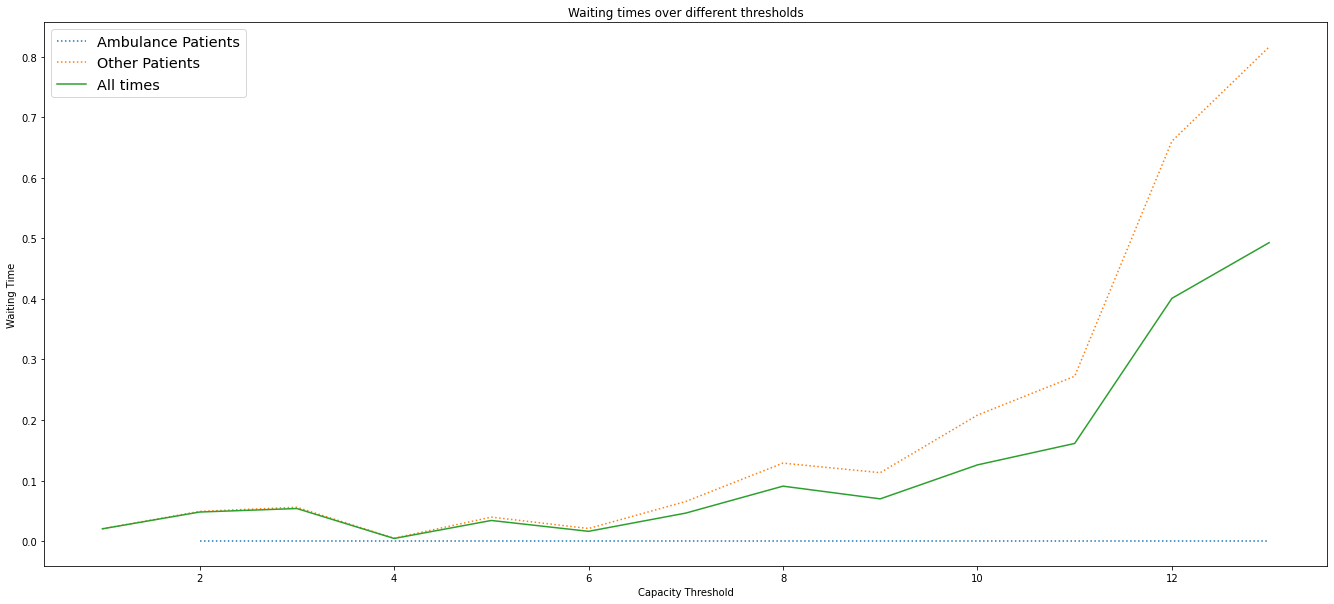

In [42]:
#4: lambda_a=0.2, lambda_o=0.3, mu=0.05, num_of_servers=13
abg.make_plot_for_different_thresholds(lambda_a=0.2, lambda_o=0.3, mu=0.05, num_of_servers=13, num_of_trials=num_of_trials, seed_num=seed_num, measurement_type="w", runtime=runtime)
plt.show()

###### Blocking Times

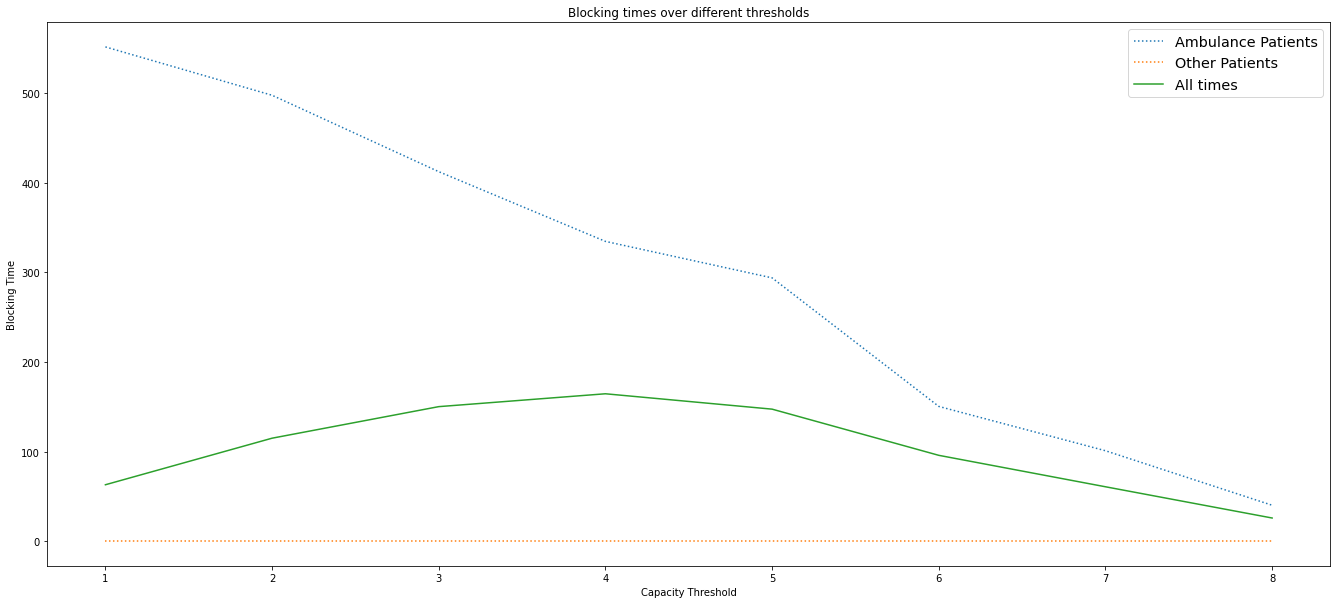

In [43]:
#1: lambda_a = 0.15, lambda_o = 0.2, mu = 0.05, num_of_servers = 8
abg.make_plot_for_different_thresholds(lambda_a=lambda_a, lambda_o=lambda_o, mu=mu, num_of_servers=num_of_servers, num_of_trials=num_of_trials, seed_num=seed_num, measurement_type="b", runtime=runtime)
plt.show()

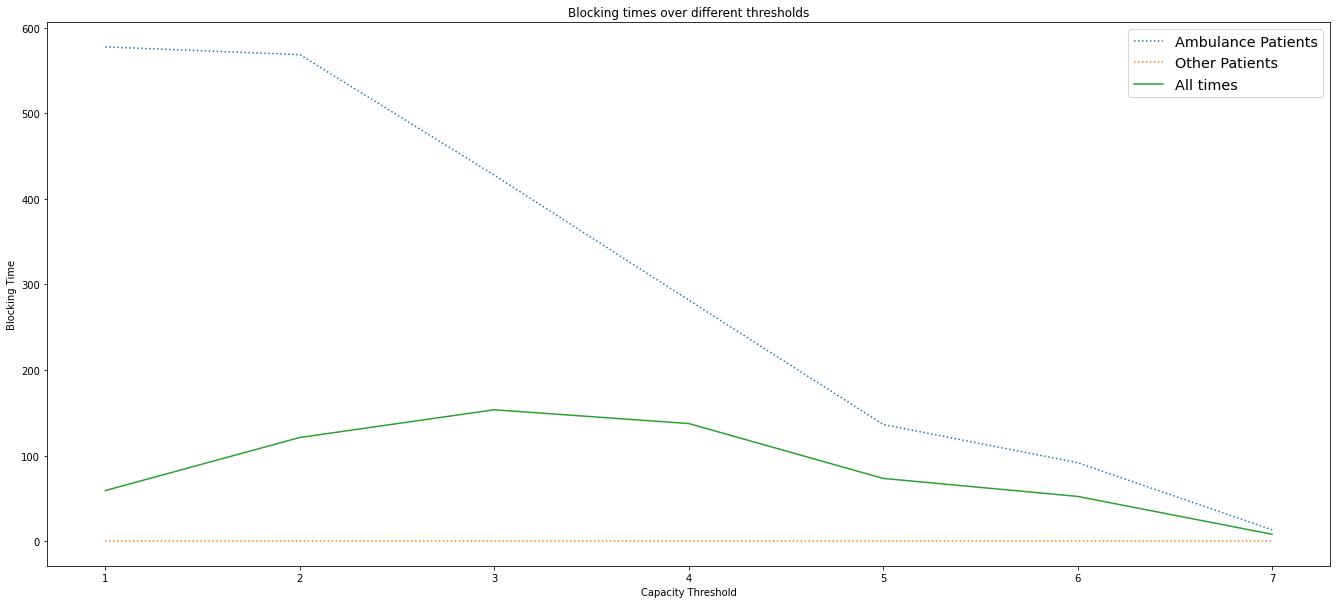

In [44]:
#2: lambda_a=0.15, lambda_o=0.1, mu=0.04, num_of_servers=7
abg.make_plot_for_different_thresholds(lambda_a=0.15, lambda_o=0.1, mu=0.04, num_of_servers=7, num_of_trials=num_of_trials, seed_num=seed_num, measurement_type="b", runtime=runtime)
plt.show()

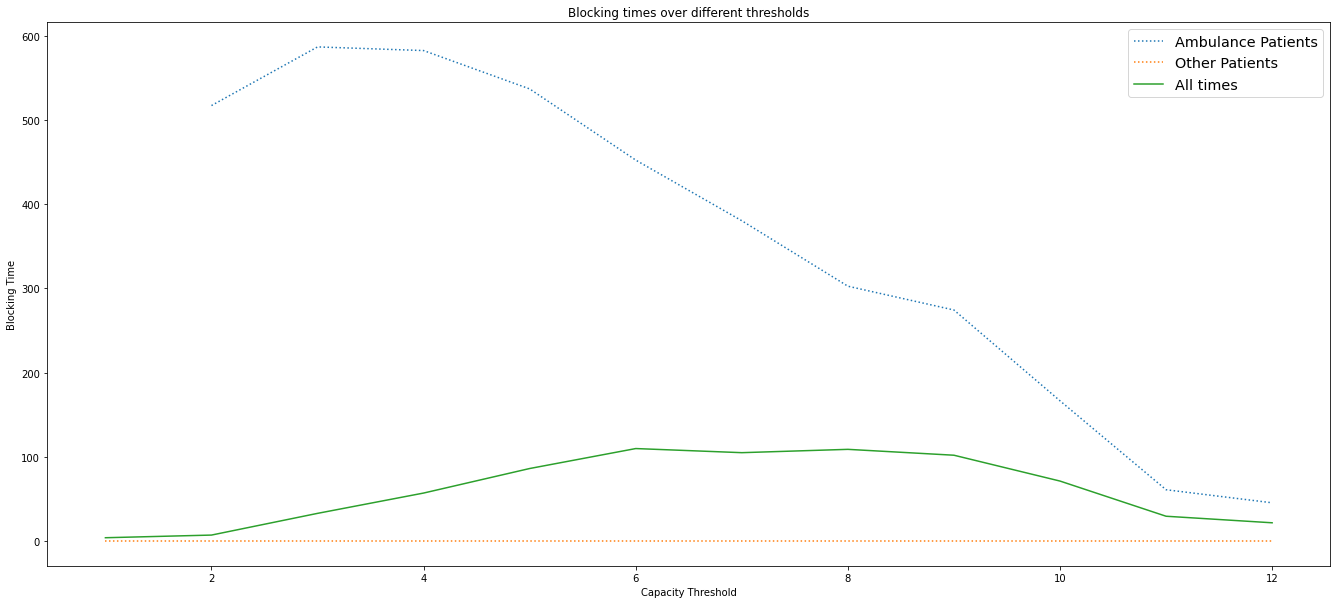

In [46]:
#3: lambda_a=0.3, lambda_o=0.3, mu=0.05, num_of_servers=12
abg.make_plot_for_different_thresholds(lambda_a=0.3, lambda_o=0.3, mu=0.05, num_of_servers=12, num_of_trials=num_of_trials, seed_num=seed_num, measurement_type="b", runtime=runtime)
plt.show()

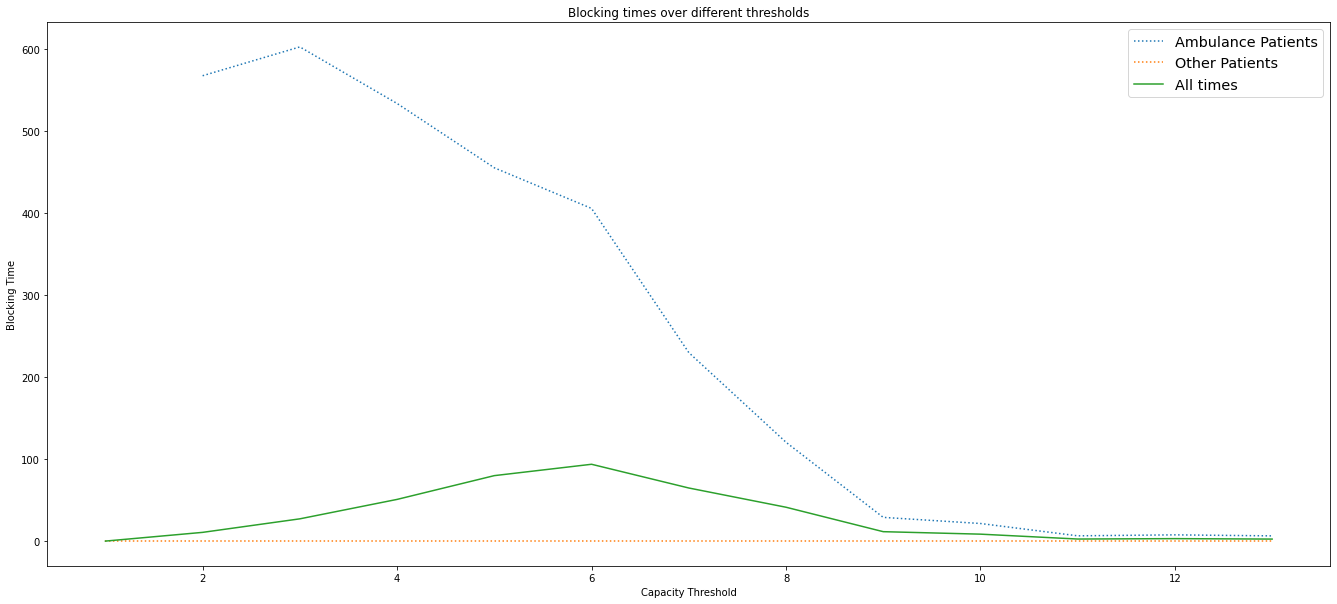

In [47]:
#4: lambda_a=0.2, lambda_o=0.3, mu=0.05, num_of_servers=13
abg.make_plot_for_different_thresholds(lambda_a=0.2, lambda_o=0.3, mu=0.05, num_of_servers=13, num_of_trials=num_of_trials, seed_num=seed_num, measurement_type="b", runtime=runtime)
plt.show()

# Model plot 2 - Plots of proportion within time limit

In [48]:
# Queueing Parameters
lambda_a = 0.1       # Ambulance: 6 arrivals per hour
lambda_o = 0.08      # Others: 4.8 arrivals per hour
mu = 0.03            # Service time: 1.8 services per hour
num_of_servers = 6   # Number of servers: 6 servers
seed_num = 10
runtime = 1440

# Plot Parameters
num_of_trials = 200
target = 4

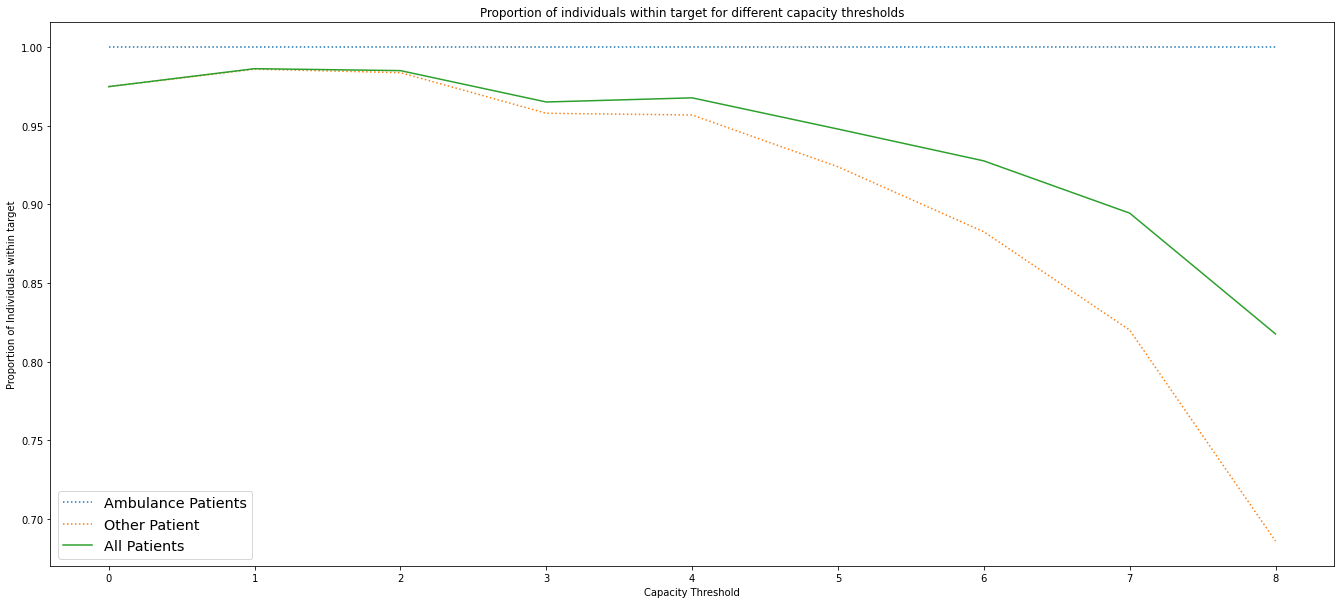

In [49]:
#1: lambda_a=0.15, lambda_o=0.2, mu=0.05, num_of_servers=8
abg.make_proportion_plot(lambda_a=0.15, lambda_o=0.2, mu=0.05, num_of_servers=8, num_of_trials=num_of_trials, seed_num=seed_num, target=target, runtime=runtime)
plt.show()

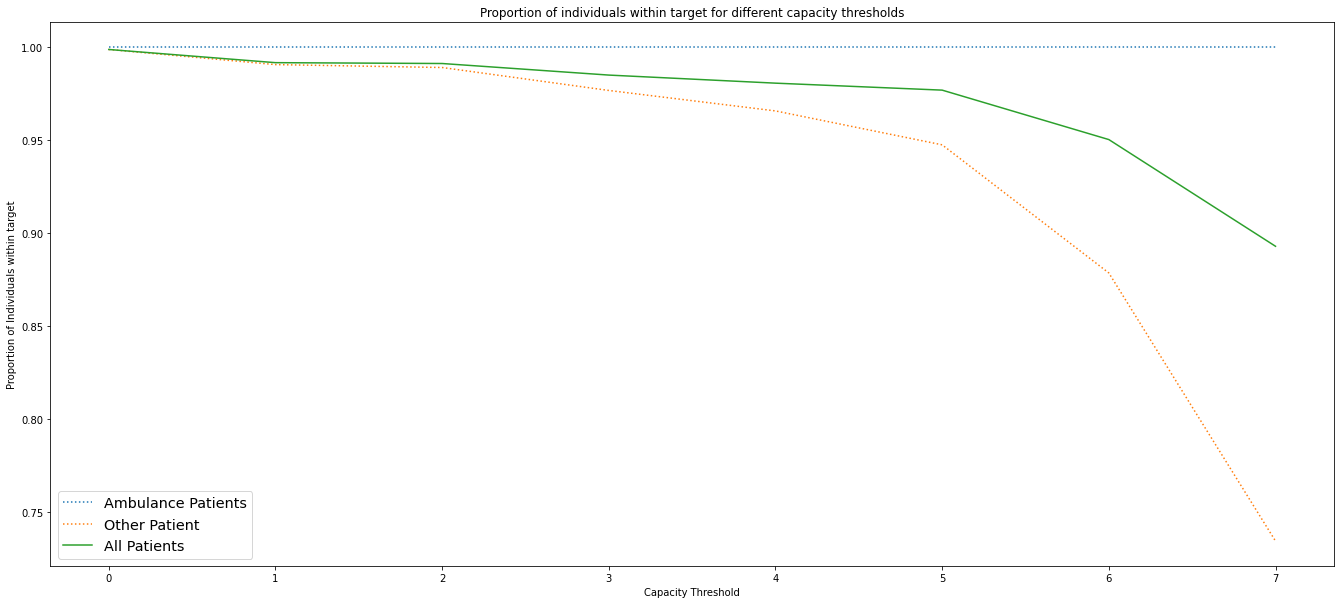

In [50]:
#2: lambda_a=0.15, lambda_o=0.1, mu=0.04, num_of_servers=7
abg.make_proportion_plot(lambda_a=0.15, lambda_o=0.1, mu=0.04, num_of_servers=7, num_of_trials=num_of_trials, seed_num=seed_num, target=target, runtime=runtime)
plt.show()

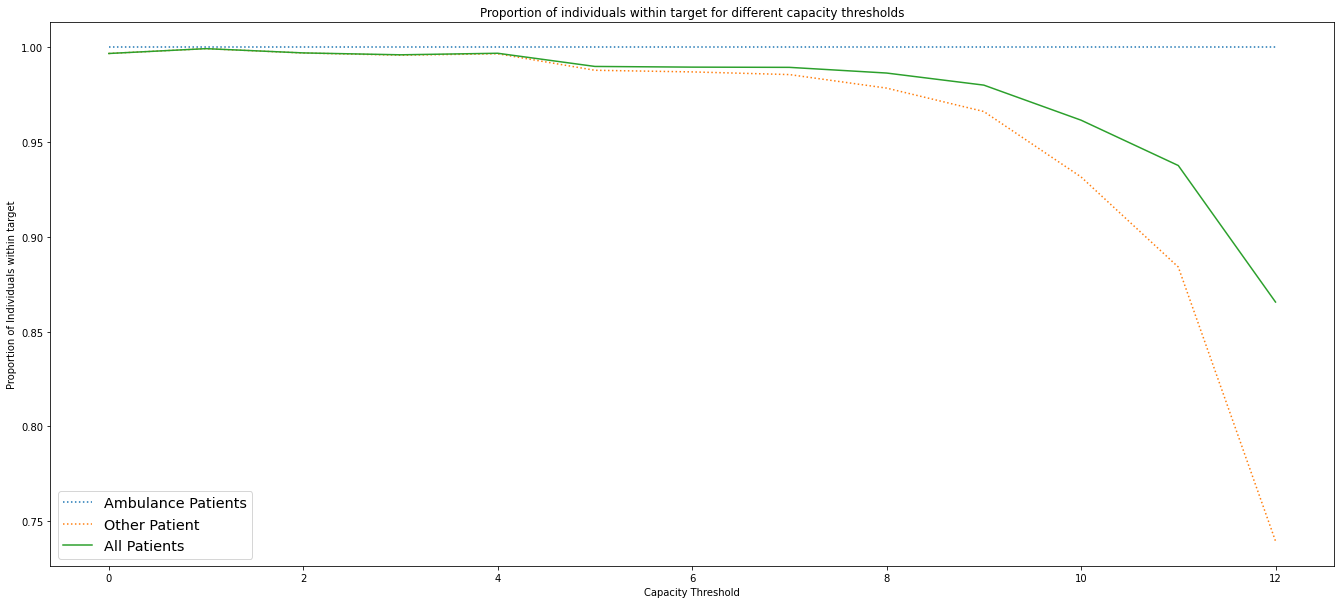

In [51]:
#3: lambda_a=0.3, lambda_o=0.3, mu=0.05, num_of_servers=12
abg.make_proportion_plot(lambda_a=0.3, lambda_o=0.3, mu=0.05, num_of_servers=12, num_of_trials=num_of_trials, seed_num=seed_num, target=target, runtime=runtime)
plt.show()

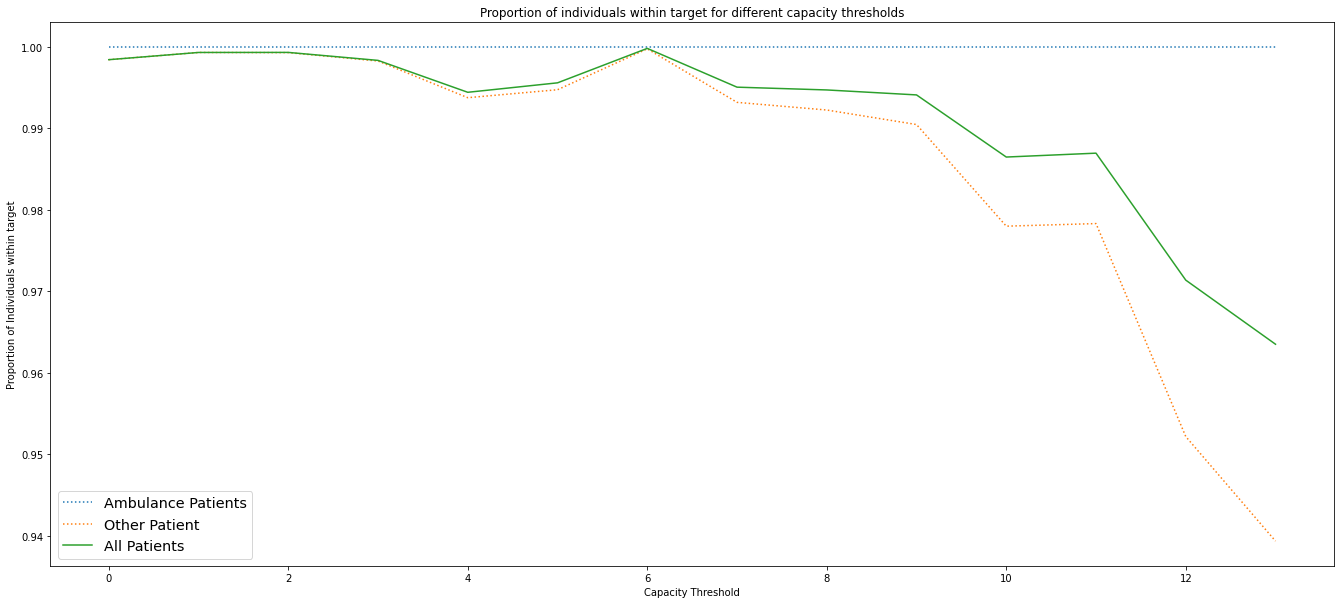

In [52]:
#4: lambda_a=0.2, lambda_o=0.3, mu=0.05, num_of_servers=13
abg.make_proportion_plot(lambda_a=0.2, lambda_o=0.3, mu=0.05, num_of_servers=13, num_of_trials=num_of_trials, seed_num=seed_num, target=target, runtime=runtime)
plt.show()

# Model plot 3 - Plot of waiting/blocking times VS thresholds for 2 hospitals

In [5]:
# System Parameters
lambda_a = 0.15
runtime = 1440

# Hospital 1 Parameters
lambda_o_1 = 0.08      # Others: 4.8 arrivals per hour
mu_1 = 0.03            # Service time: 1.8 services per hour
num_of_servers_1 = 6   # Number of servers: 6 servers
threshold_1 = 3

# Hospital 2 Parameters
lambda_o_2 = 0.08
mu_2 = 0.03
num_of_servers_2 = 6
threshold_2 = 3

# Plot Parameters
seed_num_1 = None
seed_num_2 = None
warm_up_time = 100
num_of_trials = 10
accuracy = 10

###### Waiting Times

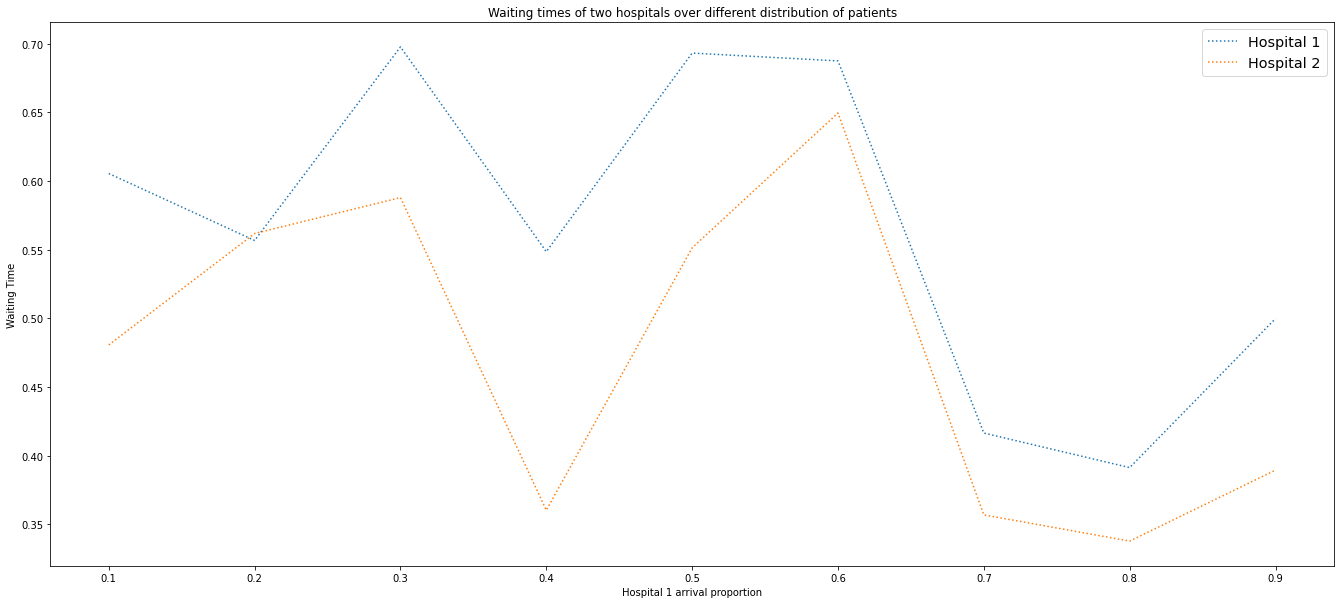

In [62]:
#1: lambda_a = 0.3, lambda_o_1 = 0.2, lambda_o_2 = 0.2, mu_1 = 0.05, mu_2 = 0.05, num_of_servers_1 = 8, num_of_servers_2 = 8, threshold_1 = 5, threshold_2 = 5
abg.make_plot_two_hospitals_arrival_split(lambda_a = 0.3, lambda_o_1 = 0.2, lambda_o_2 = 0.2, mu_1 = 0.05, mu_2 = 0.05, num_of_servers_1 = 8, num_of_servers_2 = 8, threshold_1 = 5, threshold_2 = 5, measurement_type="w", seed_num_1=seed_num_1, seed_num_2=seed_num_2, warm_up_time=warm_up_time, trials=num_of_trials, accuracy=accuracy, runtime=runtime)
plt.show()

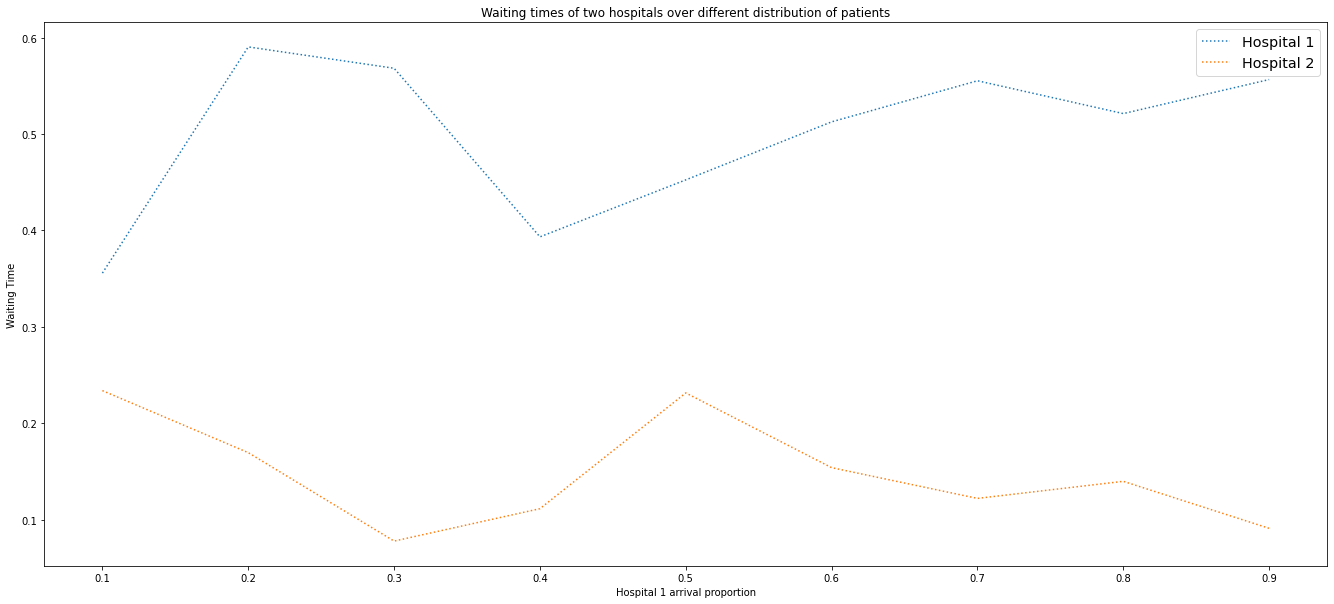

In [63]:
#2: lambda_a = 0.3, lambda_o_1 = 0.2, lambda_o_2 = 0.1, mu_1 = 0.05, mu_2 = 0.04, num_of_servers_1 = 8, num_of_servers_2 = 7, threshold_1 = 5, threshold_2 = 4
abg.make_plot_two_hospitals_arrival_split(lambda_a = 0.3, lambda_o_1 = 0.2, lambda_o_2 = 0.1, mu_1 = 0.05, mu_2 = 0.04, num_of_servers_1 = 8, num_of_servers_2 = 7, threshold_1 = 5, threshold_2 = 4, measurement_type="w", seed_num_1=seed_num_1, seed_num_2=seed_num_2, warm_up_time=warm_up_time, trials=num_of_trials, accuracy=accuracy, runtime=runtime)
plt.show()

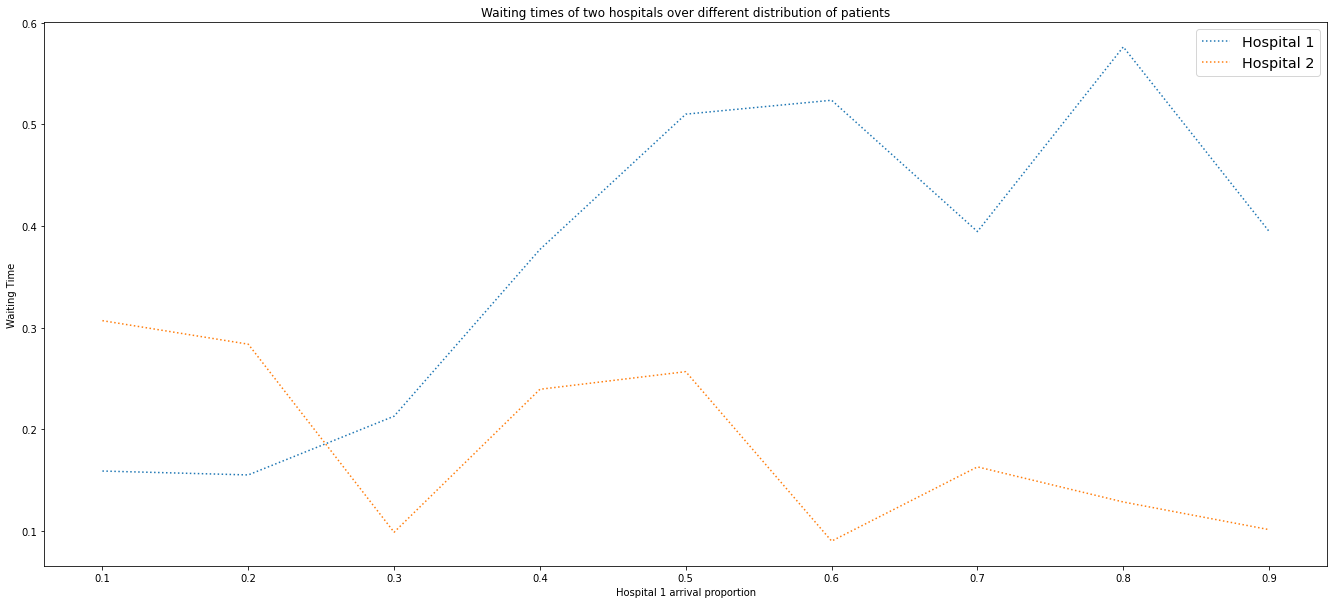

In [64]:
#3: lambda_a = 0.45, lambda_o_1 = 0.3, lambda_o_2 = 0.1, mu_1 = 0.05, mu_2 = 0.04, num_of_servers_1 = 12, num_of_servers_2 = 7, threshold_1 = 10, threshold_2 = 4
abg.make_plot_two_hospitals_arrival_split(lambda_a = 0.45, lambda_o_1 = 0.3, lambda_o_2 = 0.1, mu_1 = 0.05, mu_2 = 0.04, num_of_servers_1 = 12, num_of_servers_2 = 7, threshold_1 = 10, threshold_2 = 4, measurement_type="w", seed_num_1=seed_num_1, seed_num_2=seed_num_2, warm_up_time=warm_up_time, trials=num_of_trials, accuracy=accuracy, runtime=runtime)
plt.show()

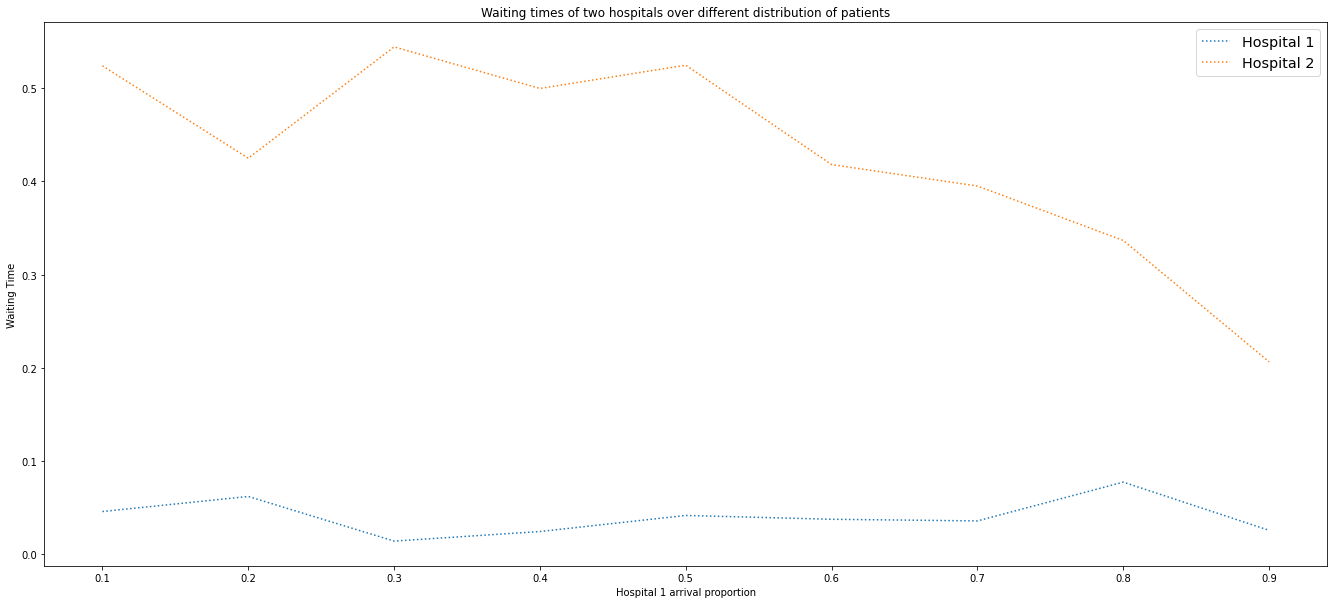

In [65]:
#4: lambda_a = 0.5, lambda_o_1 = 0.3, lambda_o_2 = 0.3, mu_1 = 0.05, mu_2 = 0.05, num_of_servers_1 = 13, num_of_servers_2 = 12, threshold_1 = 5, threshold_2 = 10
abg.make_plot_two_hospitals_arrival_split(lambda_a = 0.5, lambda_o_1 = 0.3, lambda_o_2 = 0.3, mu_1 = 0.05, mu_2 = 0.05, num_of_servers_1 = 13, num_of_servers_2 = 12, threshold_1 = 5, threshold_2 = 10, measurement_type="w", seed_num_1=seed_num_1, seed_num_2=seed_num_2, warm_up_time=warm_up_time, trials=num_of_trials, accuracy=accuracy, runtime=runtime)
plt.show()

###### Blocking Times

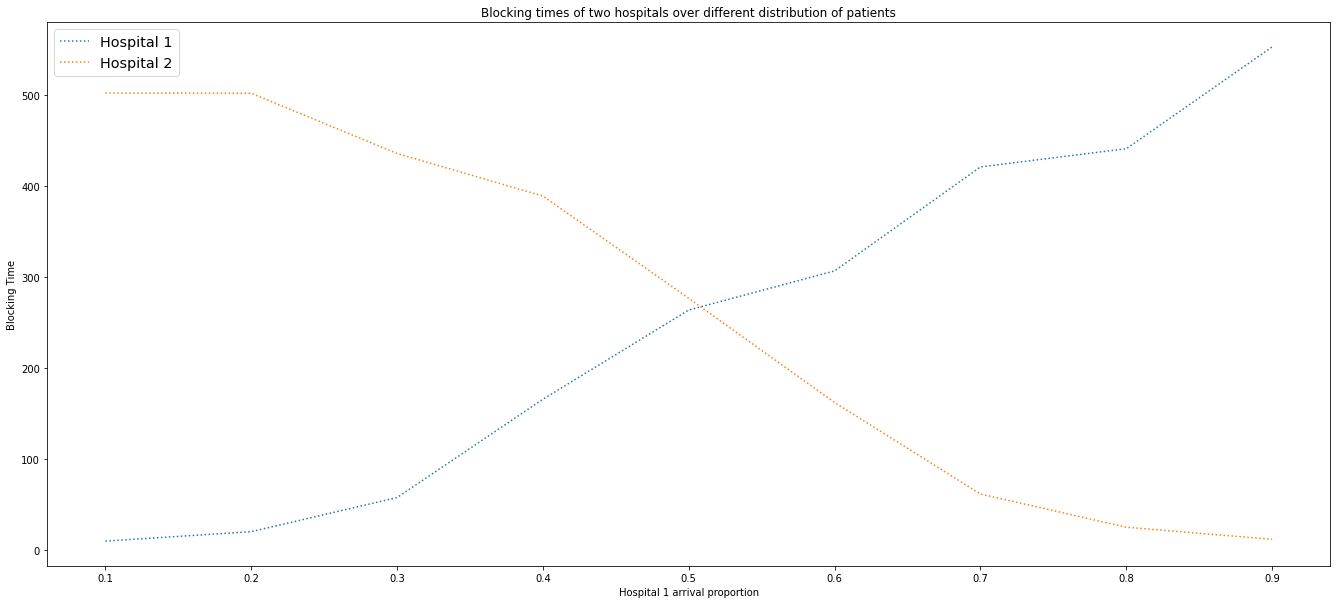

In [66]:
#1: lambda_a = 0.3, lambda_o_1 = 0.2, lambda_o_2 = 0.2, mu_1 = 0.05, mu_2 = 0.05, num_of_servers_1 = 8, num_of_servers_2 = 8, threshold_1 = 5, threshold_2 = 5
abg.make_plot_two_hospitals_arrival_split(lambda_a = 0.3, lambda_o_1 = 0.2, lambda_o_2 = 0.2, mu_1 = 0.05, mu_2 = 0.05, num_of_servers_1 = 8, num_of_servers_2 = 8, threshold_1 = 5, threshold_2 = 5, measurement_type="b", seed_num_1=seed_num_1, seed_num_2=seed_num_2, warm_up_time=warm_up_time, trials=num_of_trials, accuracy=accuracy, runtime=runtime)
plt.show()

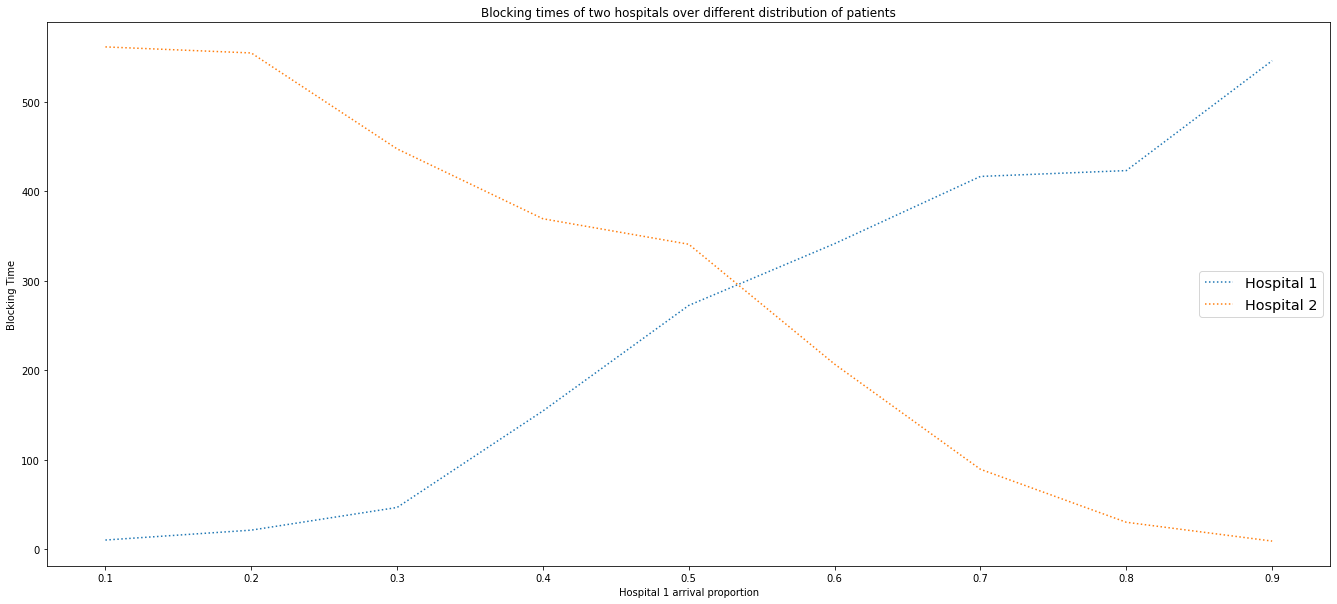

In [67]:
#2: lambda_a = 0.3, lambda_o_1 = 0.2, lambda_o_2 = 0.1, mu_1 = 0.05, mu_2 = 0.04, num_of_servers_1 = 8, num_of_servers_2 = 7, threshold_1 = 5, threshold_2 = 4
abg.make_plot_two_hospitals_arrival_split(lambda_a = 0.3, lambda_o_1 = 0.2, lambda_o_2 = 0.1, mu_1 = 0.05, mu_2 = 0.04, num_of_servers_1 = 8, num_of_servers_2 = 7, threshold_1 = 5, threshold_2 = 4, measurement_type="b", seed_num_1=seed_num_1, seed_num_2=seed_num_2, warm_up_time=warm_up_time, trials=num_of_trials, accuracy=accuracy, runtime=runtime)
plt.show()

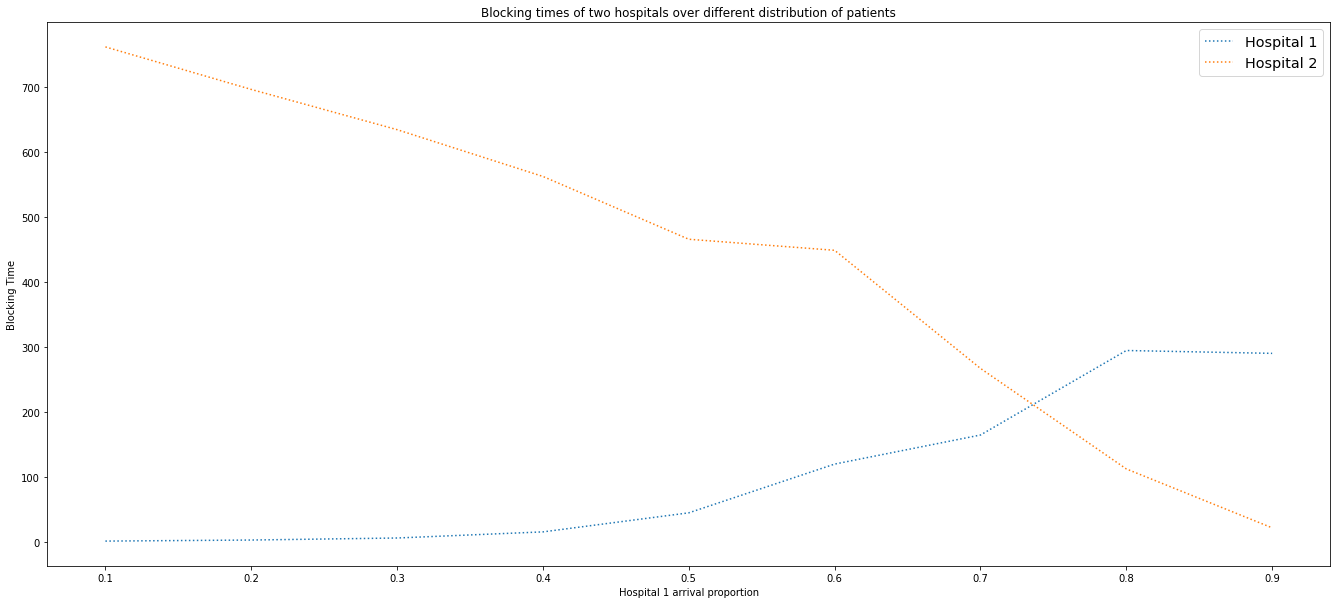

In [68]:
#3: lambda_a = 0.45, lambda_o_1 = 0.3, lambda_o_2 = 0.1, mu_1 = 0.05, mu_2 = 0.04, num_of_servers_1 = 12, num_of_servers_2 = 7, threshold_1 = 10, threshold_2 = 4
abg.make_plot_two_hospitals_arrival_split(lambda_a = 0.45, lambda_o_1 = 0.3, lambda_o_2 = 0.1, mu_1 = 0.05, mu_2 = 0.04, num_of_servers_1 = 12, num_of_servers_2 = 7, threshold_1 = 10, threshold_2 = 4, measurement_type="b", seed_num_1=seed_num_1, seed_num_2=seed_num_2, warm_up_time=warm_up_time, trials=num_of_trials, accuracy=accuracy, runtime=runtime)
plt.show()

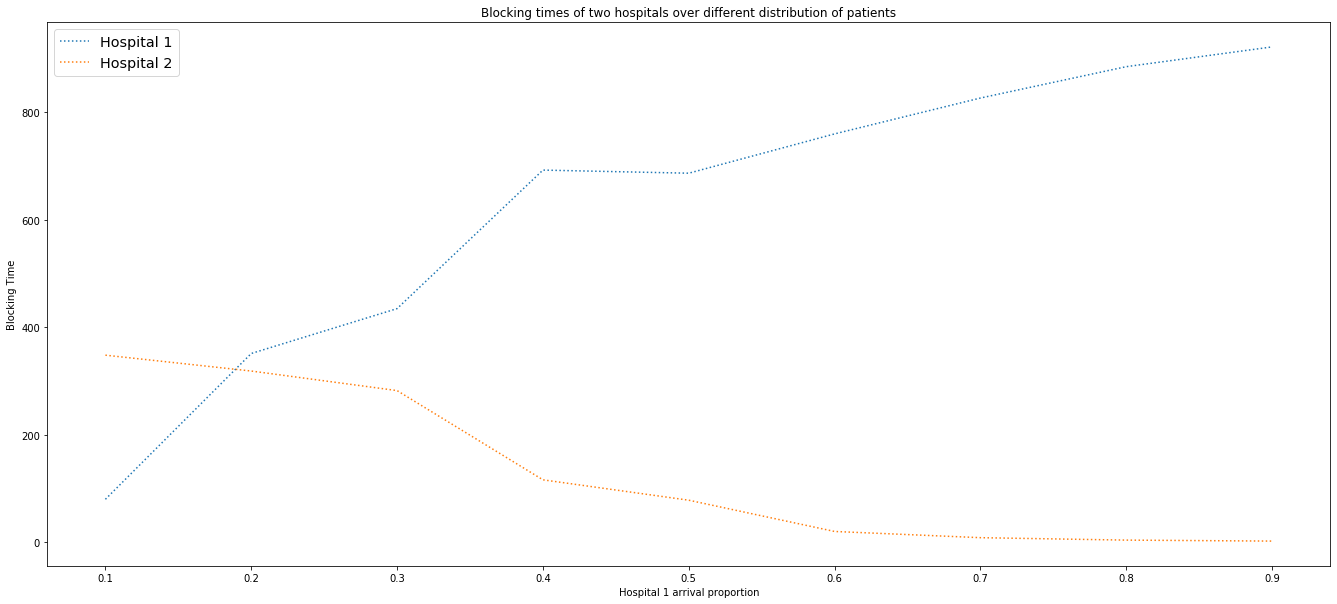

In [6]:
#4: lambda_a = 0.5, lambda_o_1 = 0.3, lambda_o_2 = 0.3, mu_1 = 0.05, mu_2 = 0.05, num_of_servers_1 = 13, num_of_servers_2 = 12, threshold_1 = 5, threshold_2 = 10
abg.make_plot_two_hospitals_arrival_split(lambda_a = 0.5, lambda_o_1 = 0.3, lambda_o_2 = 0.3, mu_1 = 0.05, mu_2 = 0.05, num_of_servers_1 = 13, num_of_servers_2 = 12, threshold_1 = 5, threshold_2 = 10, measurement_type="b", seed_num_1=seed_num_1, seed_num_2=seed_num_2, warm_up_time=warm_up_time, trials=num_of_trials, accuracy=accuracy, runtime=runtime)
plt.show()

# Model plot 4 - Waiting/Blocking times confidence intervals vs warm-up time

In [39]:
# Queueing Parameters
lambda_a = 0.1       # Ambulance: 6 arrivals per hour
lambda_o = 0.08      # Others: 4.8 arrivals per hour
mu = 0.03            # Service time: 1.8 services per hour
num_of_servers = 6   # Number of servers: 6 servers
threshold = 3
seed_num = None
runtime = 1440

# Plot Parameters
min_w = 0
max_w = 600
num_of_trials = 200

###### Waiting Times

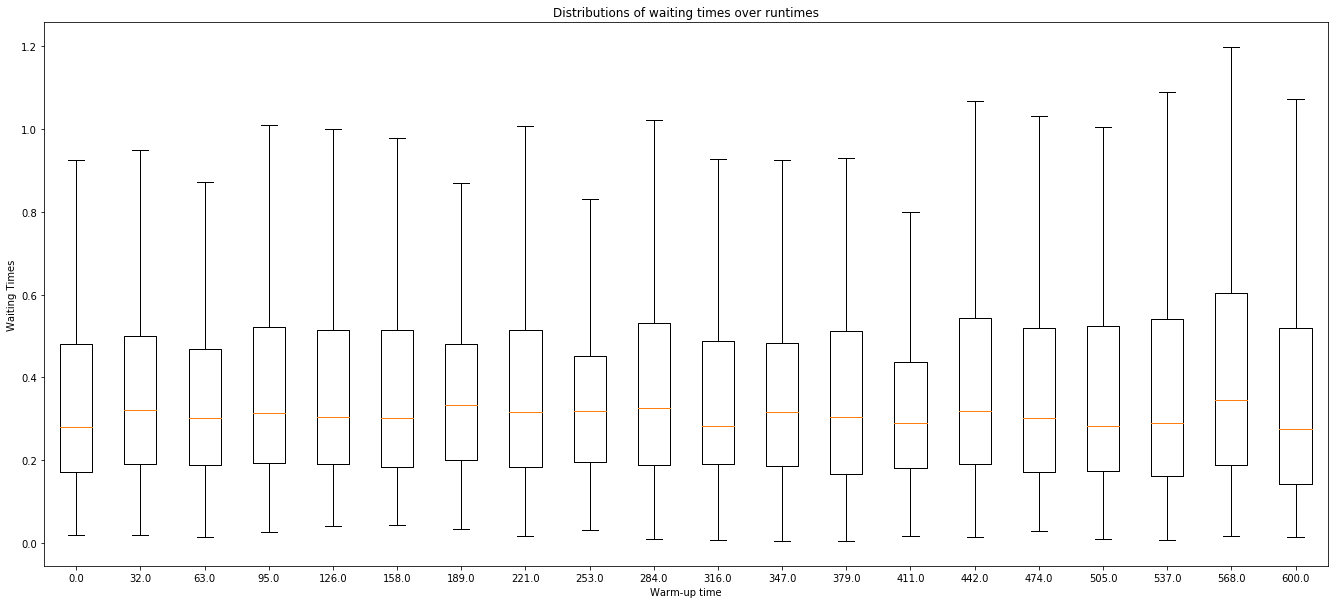

In [40]:
#1: lambda_a=0.15, lambda_o_1=0.2, mu=0.05, num_of_servers=8, threshold=5
abg.make_plot_of_confidence_intervals_over_warm_up_time(lambda_a=0.15, lambda_o=0.2, mu=0.05, num_of_servers=8, threshold=5, num_of_trials=num_of_trials, min_w=min_w, max_w=max_w, seed_num=seed_num, measurement_type="w", runtime=runtime)
plt.show()

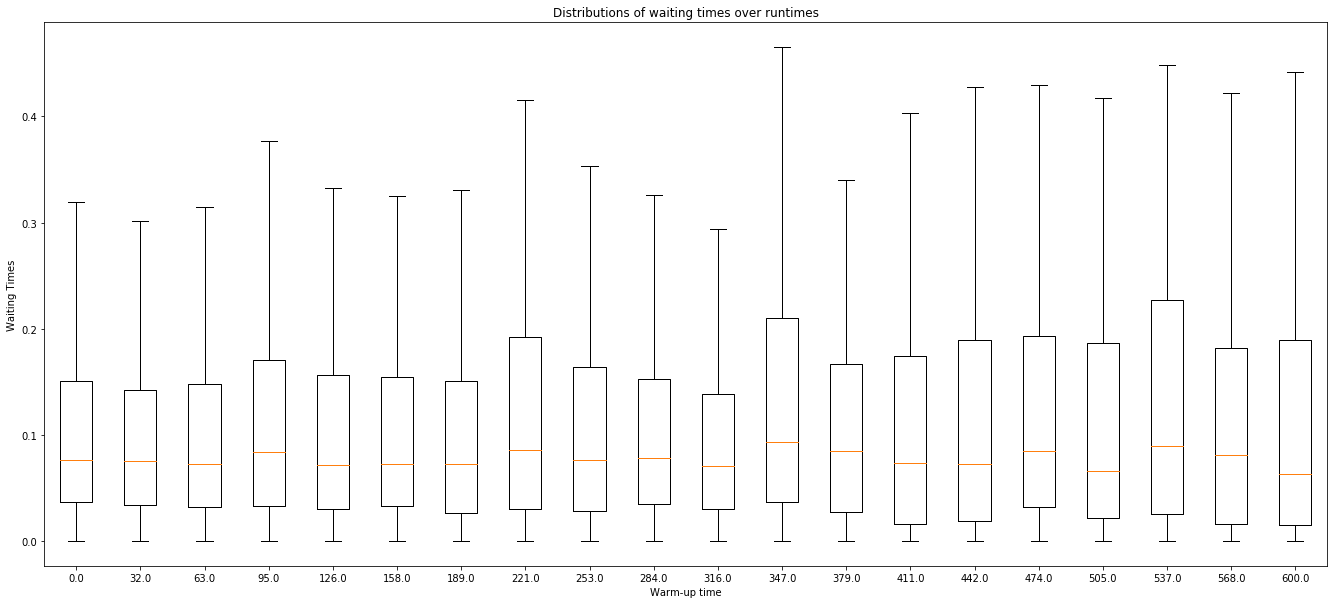

In [41]:
#2: lambda_a=0.15, lambda_o=0.1, mu=0.04, num_of_servers=7, threshold=4
abg.make_plot_of_confidence_intervals_over_warm_up_time(lambda_a=0.15, lambda_o=0.1, mu=0.04, num_of_servers=7, threshold=4, num_of_trials=num_of_trials, min_w=min_w, max_w=max_w, seed_num=seed_num, measurement_type="w", runtime=runtime)
plt.show()

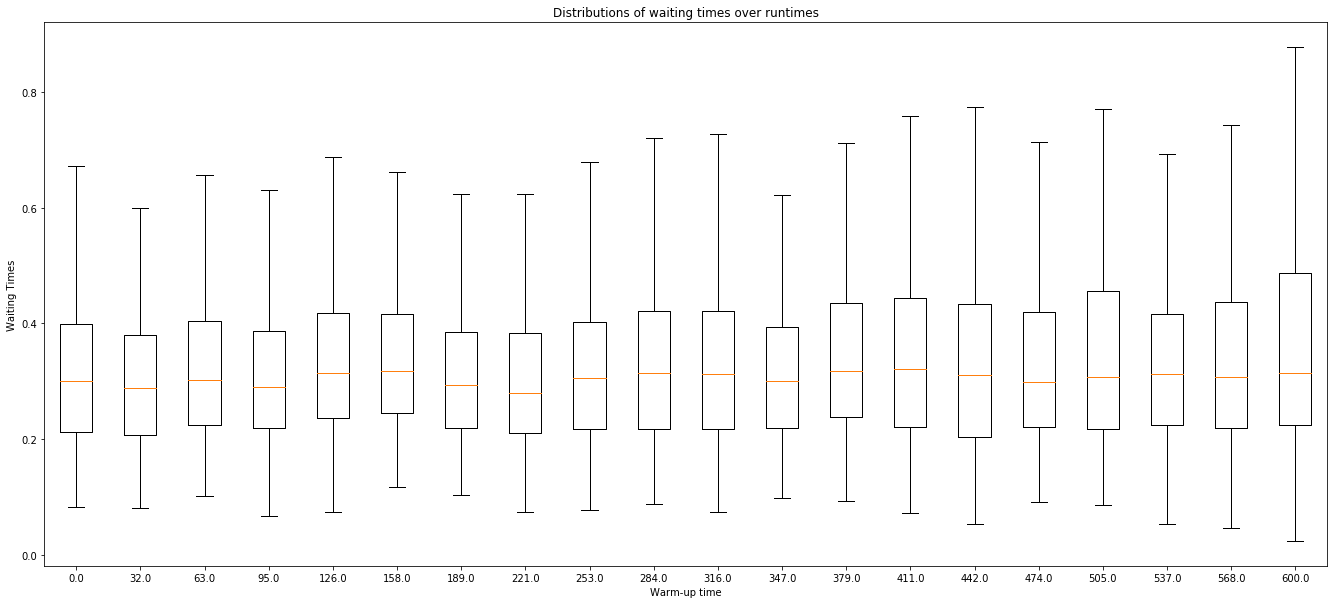

In [42]:
#3: lambda_a=0.3, lambda_o=0.3, mu=0.05, num_of_servers=12, threshold=10
abg.make_plot_of_confidence_intervals_over_warm_up_time(lambda_a=0.3, lambda_o=0.3, mu=0.05, num_of_servers=12, threshold=10, num_of_trials=num_of_trials, min_w=min_w, max_w=max_w, seed_num=seed_num, measurement_type="w", runtime=runtime)
plt.show()

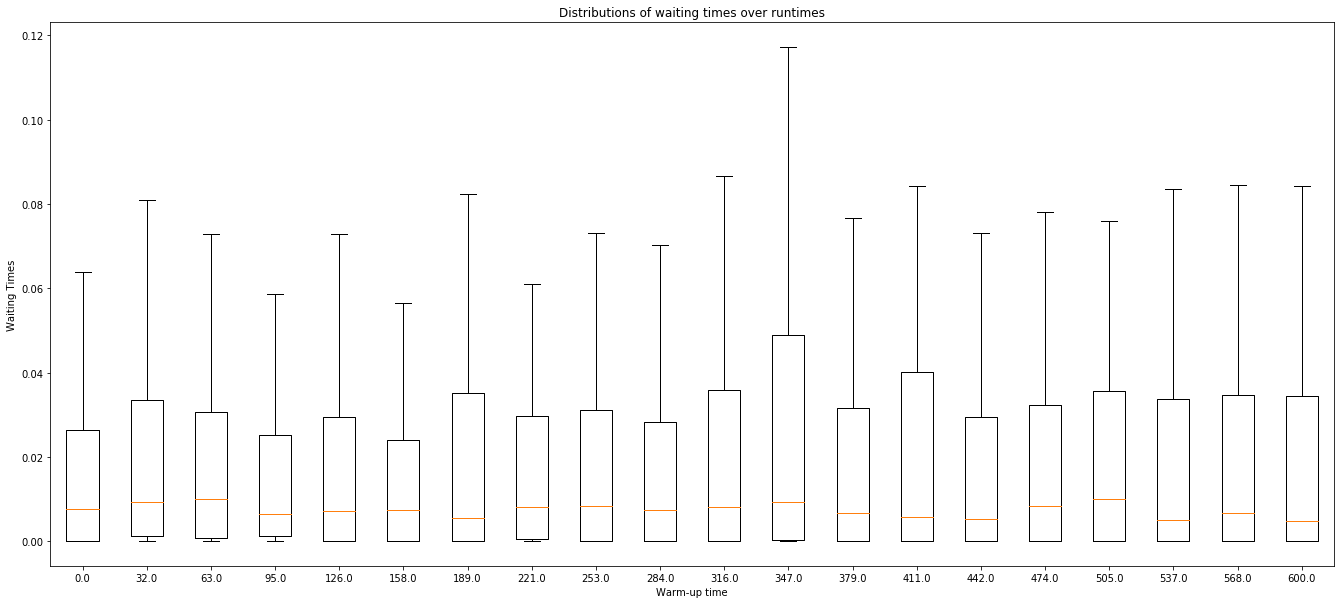

In [43]:
#4: lambda_a=0.2, lambda_o=0.3, mu=0.05, num_of_servers=13, threshold=5
abg.make_plot_of_confidence_intervals_over_warm_up_time(lambda_a=0.2, lambda_o=0.3, mu=0.05, num_of_servers=13, threshold=5, num_of_trials=num_of_trials, min_w=min_w, max_w=max_w, seed_num=seed_num, measurement_type="w", runtime=runtime)
plt.show()

###### Blocking Times

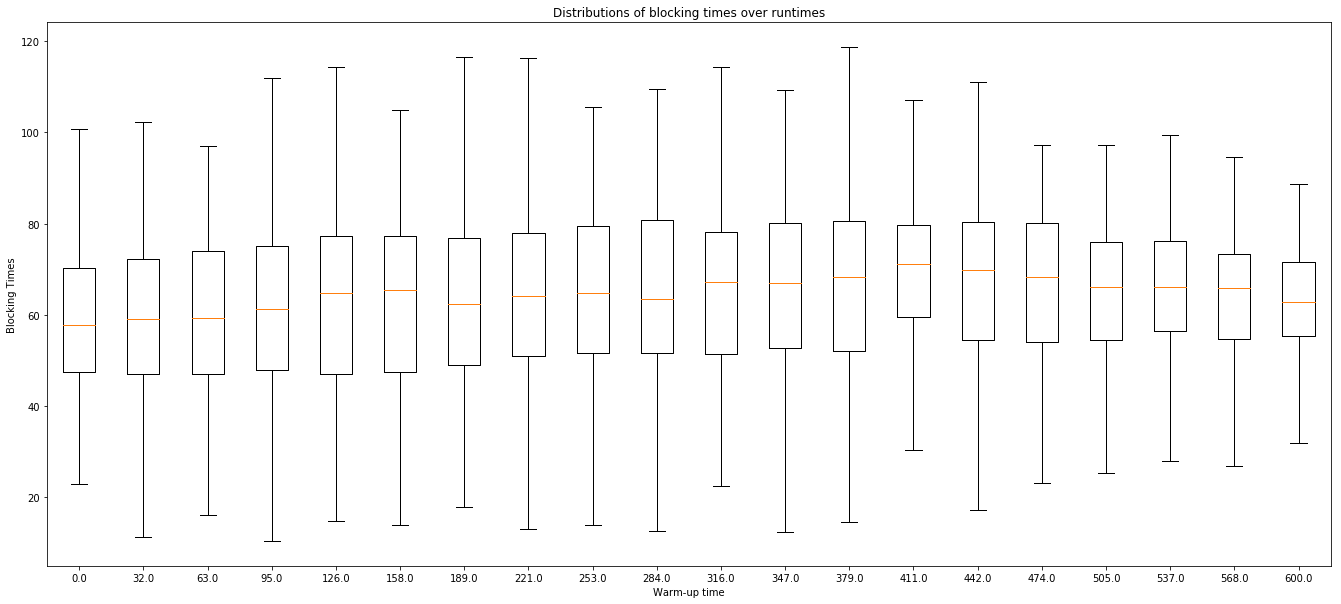

In [44]:
#1: lambda_a=0.15, lambda_o=0.2, mu=0.05, num_of_servers=8, threshold=5
abg.make_plot_of_confidence_intervals_over_warm_up_time(lambda_a=0.15, lambda_o=0.2, mu=0.05, num_of_servers=8, threshold=5, num_of_trials=num_of_trials, min_w=min_w, max_w=max_w, seed_num=seed_num, measurement_type="b", runtime=runtime)
plt.show()

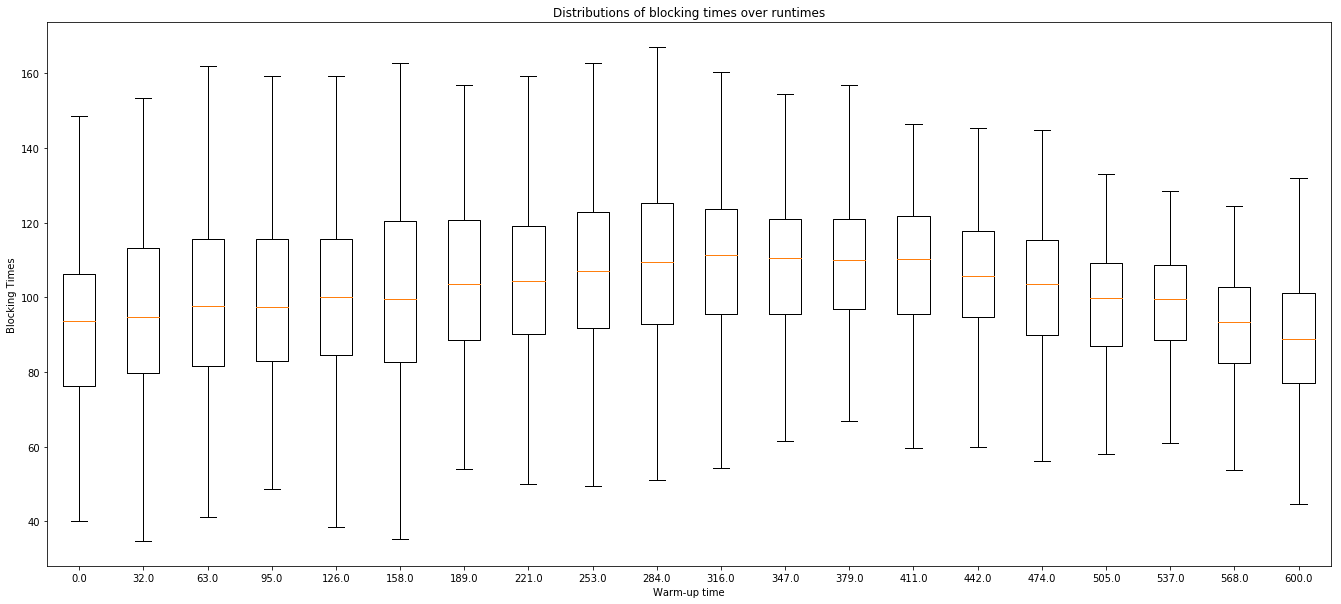

In [45]:
#2: lambda_a=0.15, lambda_o=0.1, mu=0.04, num_of_servers=7, threshold=4
abg.make_plot_of_confidence_intervals_over_warm_up_time(lambda_a=0.15, lambda_o=0.1, mu=0.04, num_of_servers=7, threshold=4, num_of_trials=num_of_trials, min_w=min_w, max_w=max_w, seed_num=seed_num, measurement_type="b", runtime=runtime)
plt.show()

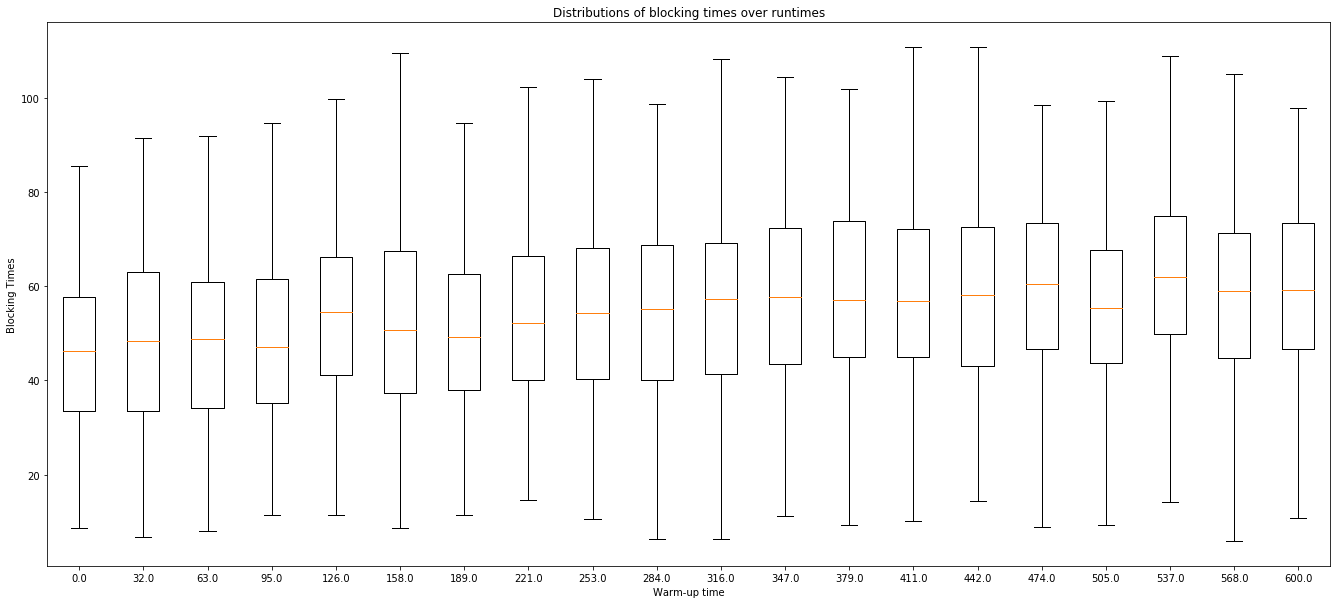

In [46]:
#3: lambda_a=0.3, lambda_o=0.3, mu=0.05, num_of_servers=12, threshold=10
abg.make_plot_of_confidence_intervals_over_warm_up_time(lambda_a=0.3, lambda_o=0.3, mu=0.05, num_of_servers=12, threshold=10, num_of_trials=num_of_trials, min_w=min_w, max_w=max_w, seed_num=seed_num, measurement_type="b", runtime=runtime)
plt.show()

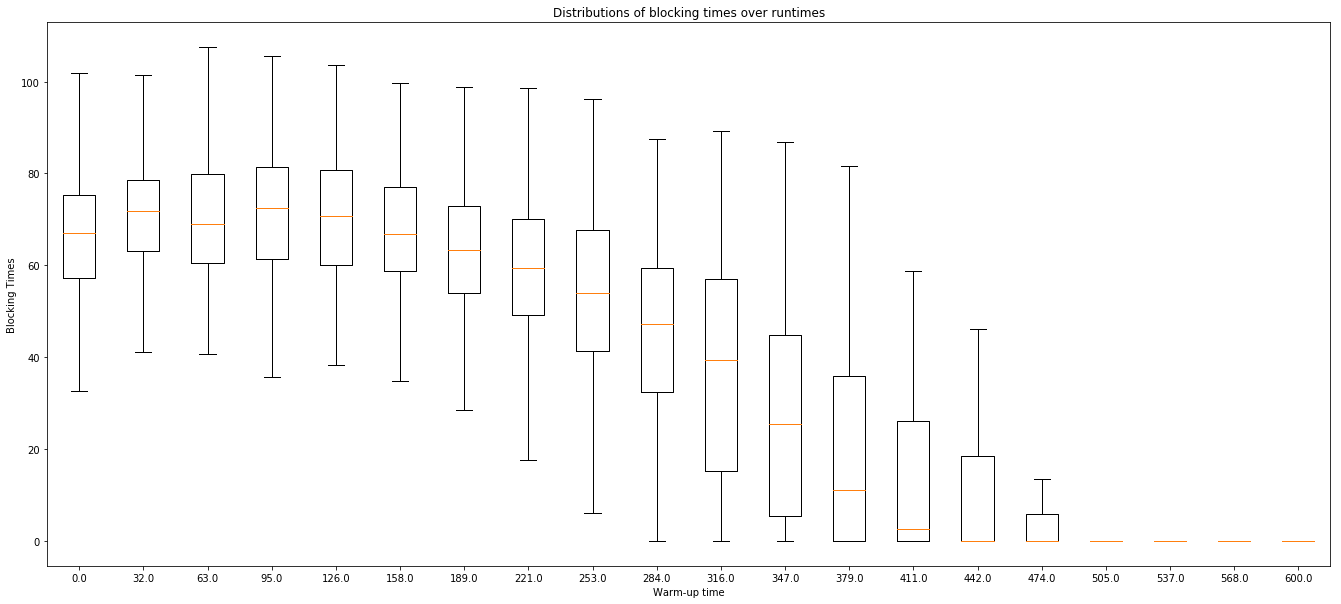

In [47]:
#4: lambda_a=0.2, lambda_o=0.3, mu=0.05, num_of_servers=13, threshold=5
abg.make_plot_of_confidence_intervals_over_warm_up_time(lambda_a=0.2, lambda_o=0.3, mu=0.05, num_of_servers=13, threshold=5, num_of_trials=num_of_trials, min_w=min_w, max_w=max_w, seed_num=seed_num, measurement_type="b", runtime=runtime)
plt.show()

# Model plot 5 - Waiting/Blocking times confidence intervals vs runtime

In [48]:
# Queueing Parameters
lambda_a = 0.1       # Ambulance: 6 arrivals per hour
lambda_o = 0.08      # Others: 4.8 arrivals per hour
mu = 0.03            # Service time: 1.8 services per hour
num_of_servers = 6   # Number of servers: 6 servers
threshold = 4
seed_num = None
warm_up_time = 200

# Plot Parameters
min_r = 700
max_r = 28000
num_of_trials = 20

###### Waiting Times

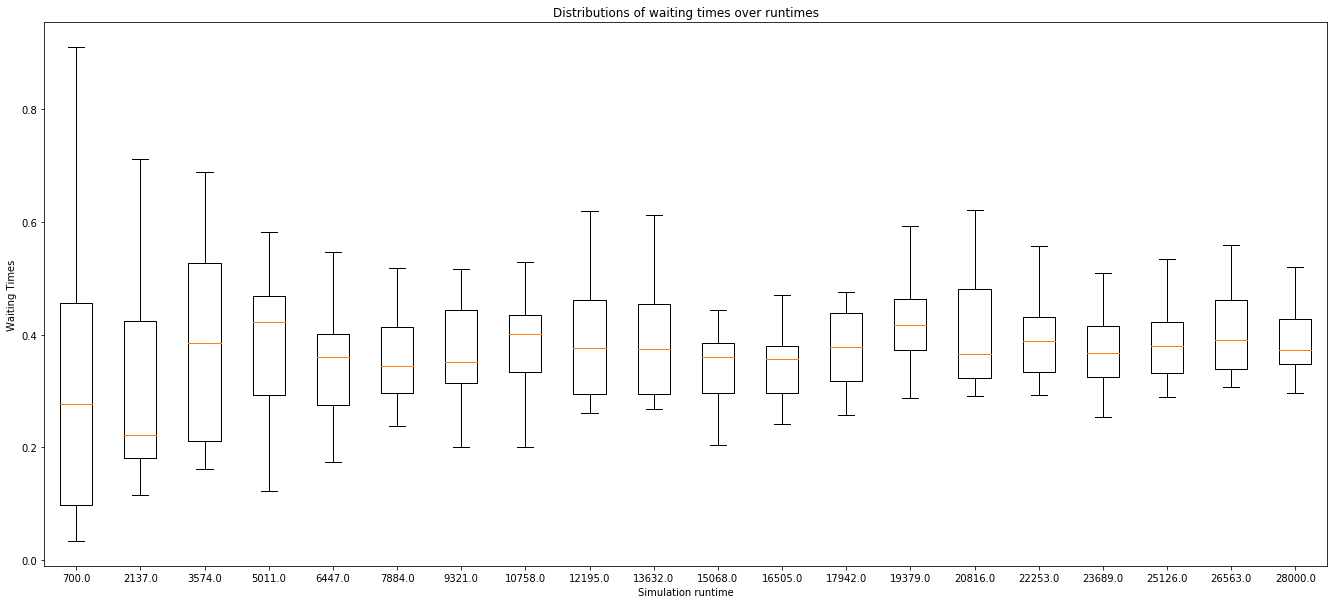

In [49]:
#1: lambda_a=0.15, lambda_o=0.2, mu=0.05, num_of_servers=8, threshold=5
abg.make_plot_of_confidence_intervals_over_runtime(lambda_a=0.15, lambda_o=0.2, mu=0.05, num_of_servers=8, threshold=5, warm_up_time=warm_up_time, num_of_trials=num_of_trials, min_r=min_r, max_r=max_r, seed_num=seed_num, measurement_type="w")
plt.show()

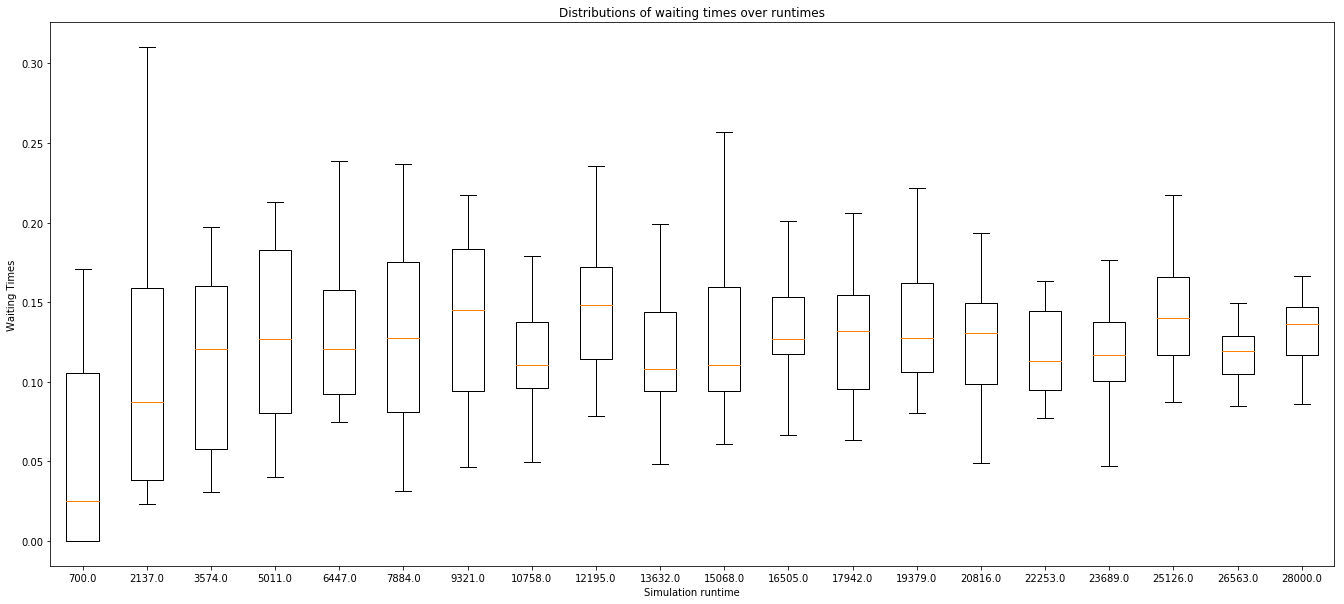

In [50]:
#2: lambda_a=0.15, lambda_o=0.1, mu=0.04, num_of_servers=7, threshold=4
abg.make_plot_of_confidence_intervals_over_runtime(lambda_a=0.15, lambda_o=0.1, mu=0.04, num_of_servers=7, threshold=4, warm_up_time=warm_up_time, num_of_trials=num_of_trials, min_r=min_r, max_r=max_r, seed_num=seed_num, measurement_type="w")
plt.show()

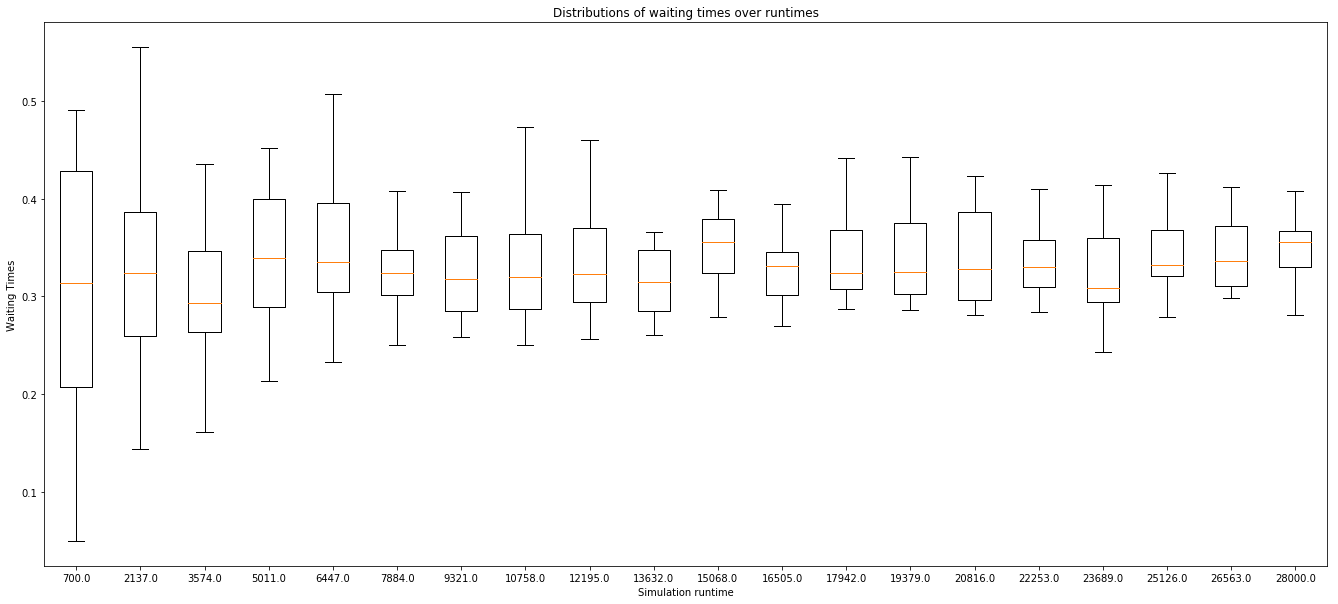

In [51]:
#3: lambda_a=0.3, lambda_o=0.3, mu=0.05, num_of_servers=12, threshold=10
abg.make_plot_of_confidence_intervals_over_runtime(lambda_a=0.3, lambda_o=0.3, mu=0.05, num_of_servers=12, threshold=10, warm_up_time=warm_up_time, num_of_trials=num_of_trials, min_r=min_r, max_r=max_r, seed_num=seed_num, measurement_type="w")
plt.show()

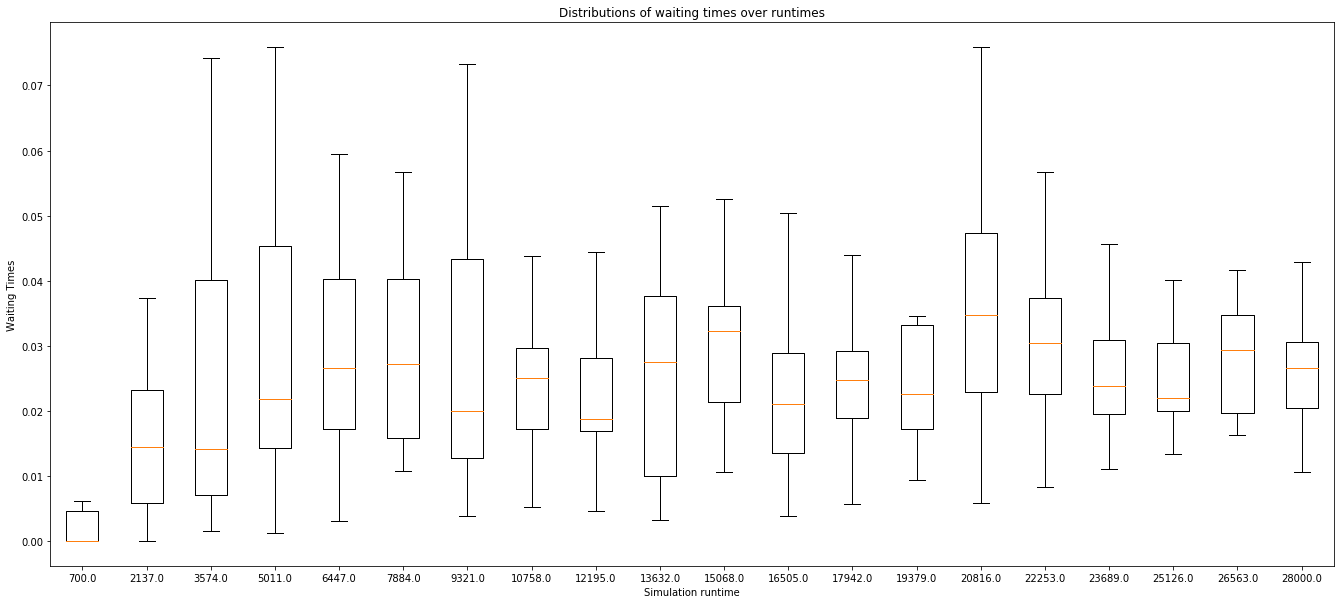

In [52]:
#4: lambda_a=0.2, lambda_o=0.3, mu=0.05, num_of_servers=13, threshold=5
abg.make_plot_of_confidence_intervals_over_runtime(lambda_a=0.2, lambda_o=0.3, mu=0.05, num_of_servers=13, threshold=5, warm_up_time=warm_up_time, num_of_trials=num_of_trials, min_r=min_r, max_r=max_r, seed_num=seed_num, measurement_type="w")
plt.show()

###### Blocking Times

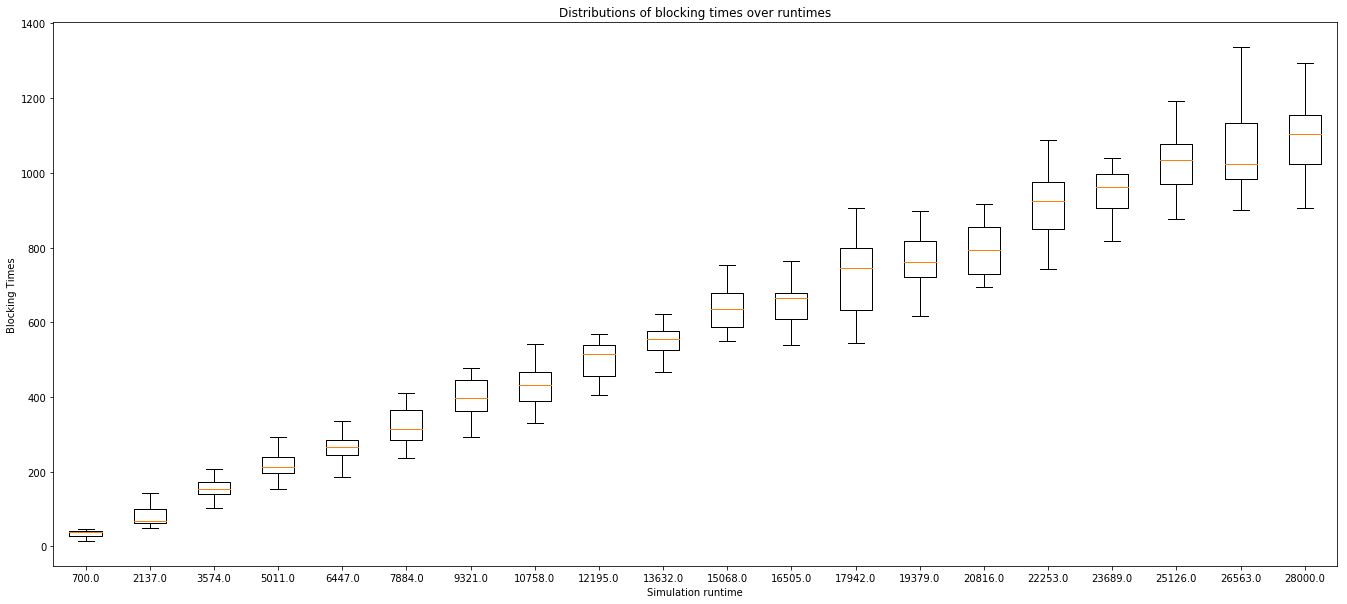

In [53]:
#1: lambda_a=0.15, lambda_o=0.2, mu=0.05, num_of_servers=8, threshold=5
abg.make_plot_of_confidence_intervals_over_runtime(lambda_a=0.15, lambda_o=0.2, mu=0.05, num_of_servers=8, threshold=5, warm_up_time=warm_up_time, num_of_trials=num_of_trials, min_r=min_r, max_r=max_r, seed_num=seed_num, measurement_type="b")
plt.show()

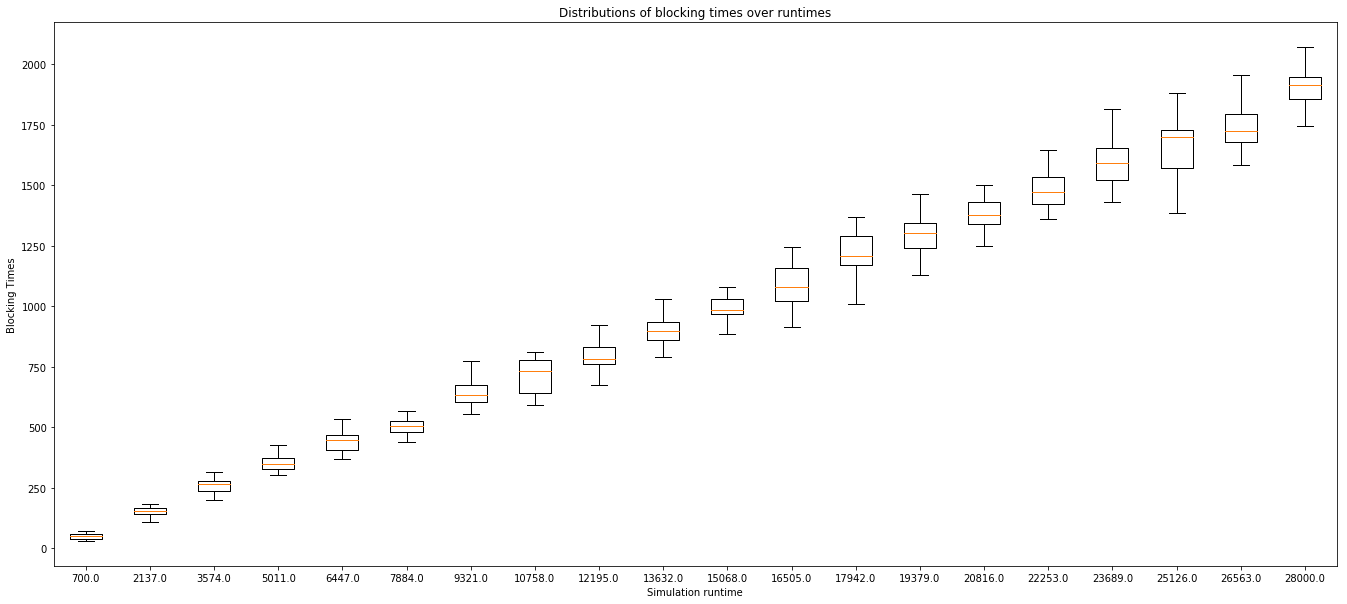

In [54]:
#2: lambda_a=0.15, lambda_o=0.1, mu=0.04, num_of_servers=7, threshold=4
abg.make_plot_of_confidence_intervals_over_runtime(lambda_a=0.15, lambda_o=0.1, mu=0.04, num_of_servers=7, threshold=4, warm_up_time=warm_up_time, num_of_trials=num_of_trials, min_r=min_r, max_r=max_r, seed_num=seed_num, measurement_type="b")
plt.show()

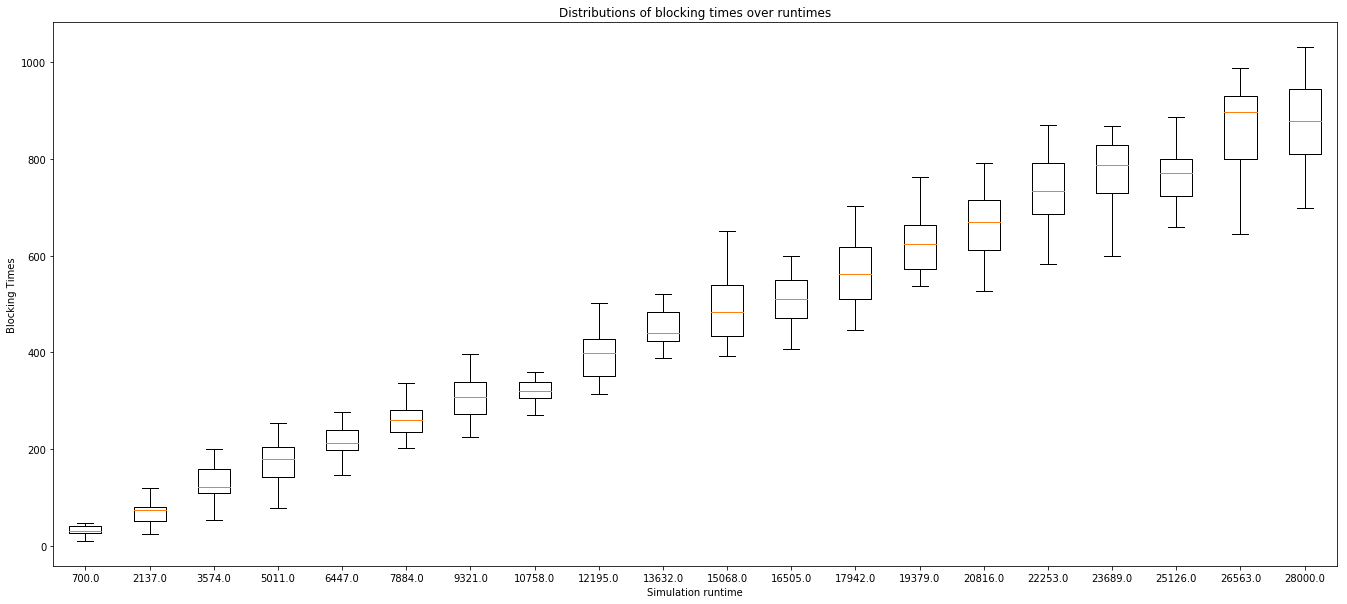

In [55]:
#3: lambda_a=0.3, lambda_o=0.3, mu=0.05, num_of_servers=12, threshold=10
abg.make_plot_of_confidence_intervals_over_runtime(lambda_a=0.3, lambda_o=0.3, mu=0.05, num_of_servers=12, threshold=10, warm_up_time=warm_up_time, num_of_trials=num_of_trials, min_r=min_r, max_r=max_r, seed_num=seed_num, measurement_type="b")
plt.show()

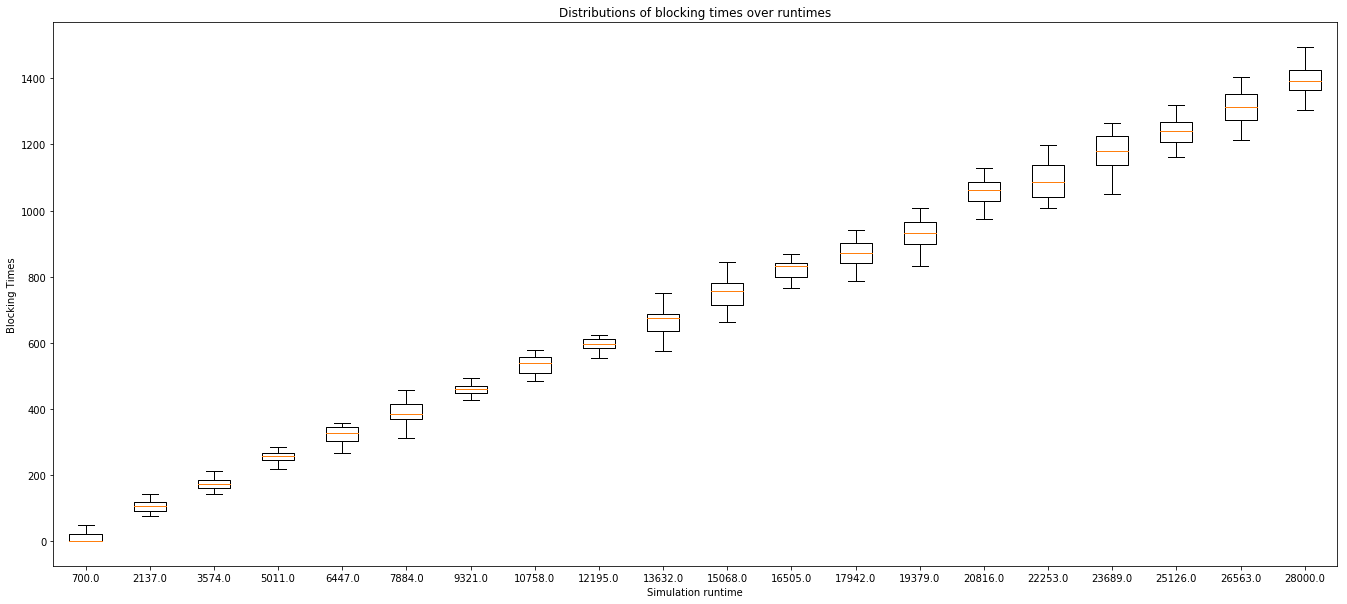

In [56]:
#4: lambda_a=0.2, lambda_o=0.3, mu=0.05, num_of_servers=13, threshold=5
abg.make_plot_of_confidence_intervals_over_runtime(lambda_a=0.2, lambda_o=0.3, mu=0.05, num_of_servers=13, threshold=5, warm_up_time=warm_up_time, num_of_trials=num_of_trials, min_r=min_r, max_r=max_r, seed_num=seed_num, measurement_type="b")
plt.show()

# Examples for testing

In [ ]:
lambda_a=0.15, lambda_o=0.2, mu=0.05, num_of_servers=8, threshold=5
lambda_a=0.15, lambda_o=0.1, mu=0.04, num_of_servers=7, threshold=4
lambda_a=0.3, lambda_o=0.3, mu=0.05, num_of_servers=12, threshold=10
lambda_a=0.2, lambda_o=0.3, mu=0.05, num_of_servers=13, threshold=5

In [170]:
ciw.seed(5)
Q = ciw.Simulation(build_model(1, 1, 2, 1))

Q.simulate_until_max_time(100)
records = Q.get_all_records()
waits = [r.waiting_time for r in records]
blocks = [r.time_blocked for r in records]

print(len(records))
print(sum(waits))
print(sum(blocks))

290
1089.854729732795
0.0


In [171]:
ciw.seed(5)
Q = ciw.Simulation(build_model(1, 1, 2, 1), node_class=build_custom_node(7))

Q.simulate_until_max_time(100)
records = Q.get_all_records()
waits = [r.waiting_time for r in records]
blocks = [r.time_blocked for r in records]

print(len(records))
print(sum(waits))
print(sum(blocks))

290
1040.318433783405
52.00679633745028


In [172]:
sim_results = []
for i in range(10):
    simulation = simulate_model(0.15, 0.2, 0.05, 8, 4, i)
    sim_results.append(len(simulation.get_all_records()))

In [173]:
sim_results

[699, 719, 759, 715, 703, 719, 695, 685, 775, 719]

# To Discuss

In [23]:
# Simulation Parameters
lambda_a = 0.15       # Ambulance: 6 arrivals per hour
lambda_o = 0.2       # Others: 3 arrivals per hour
mu = 0.05            # Service time: 3 services per hour
num_of_servers = 8   # Number of servers: 8 servers
threshold = 4        # Threshold of accepting ambulance patients
seed_num = None      # ciw.seed value

In [24]:
dummy_model = abg.models.simulate_model(lambda_a, lambda_o, mu, num_of_servers, threshold, seed_num).get_all_records()

In [25]:
dummy_waits_node_1 = [i.waiting_time for i in dummy_model if i.node == 1]
dummy_blocs_node_2 = [i.time_blocked for i in dummy_model if i.node == 2]

In [26]:
print(all(dummy_waits_node_1) == 0)
print(all(dummy_blocs_node_2) == 0)

True
True


###### For any parmeters all waiting times from node 1 will be 0 and all blocking times from node 2 will be 0

In [57]:
dummy_waits_node_1

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [70]:
dummy_blocs_node_2

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

# Dummy Cells

In [10]:
a = np.array([np.NaN, np.NaN, 3])
np.nanmean(a)

3.0